In [1]:
#Import Statements
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
import numpy as np

/var/folders/_s/_00lkhv535330jbbr5lhj18m0000gn/T/ipykernel_17962/1010443382.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


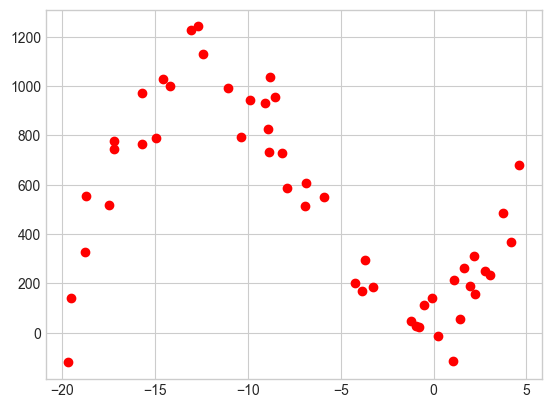

In [2]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [3]:
def fit_polynomial(x, y, degree):
    # Turn the input arrays into vectors
    vector_x = x.ravel()
    vector_y = y.ravel()

    # Fit a polynomial of the specified degree
    coefficients = np.polyfit(vector_x, vector_y, degree)
    p = np.poly1d(coefficients)

    # Sort x values
    sorted_x = np.sort(vector_x)

    # Get the y values for the sorted polynomial
    y_curve = p(sorted_x)

    polyData = {
        "p": p,
        "vector_x": vector_x,
        "vector_y": vector_y,
        "sorted_x": sorted_x,
        "y_curve": y_curve
    }

    return polyData

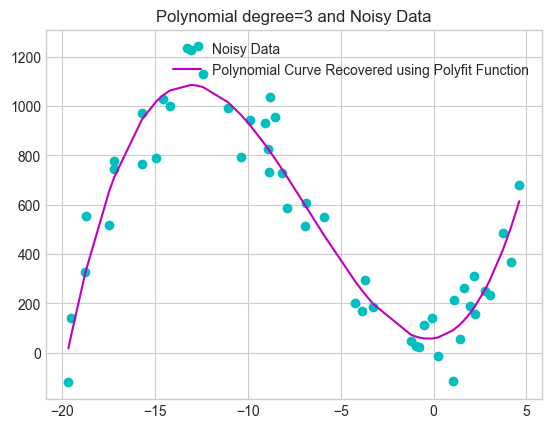

In [4]:
polyData = fit_polynomial(x, y, 3)

plt.title('Polynomial degree=3 and Noisy Data')
plt.plot(polyData["vector_x"], polyData["vector_y"], 'co', label='Noisy Data')
plt.plot(polyData["sorted_x"], polyData["y_curve"], 'm-', label='Polynomial Curve Recovered using Polyfit Function')
plt.legend()
plt.show()

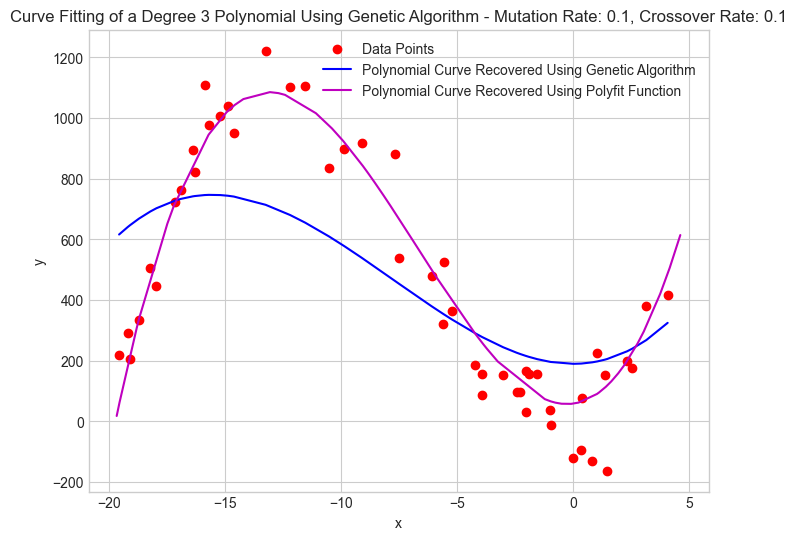

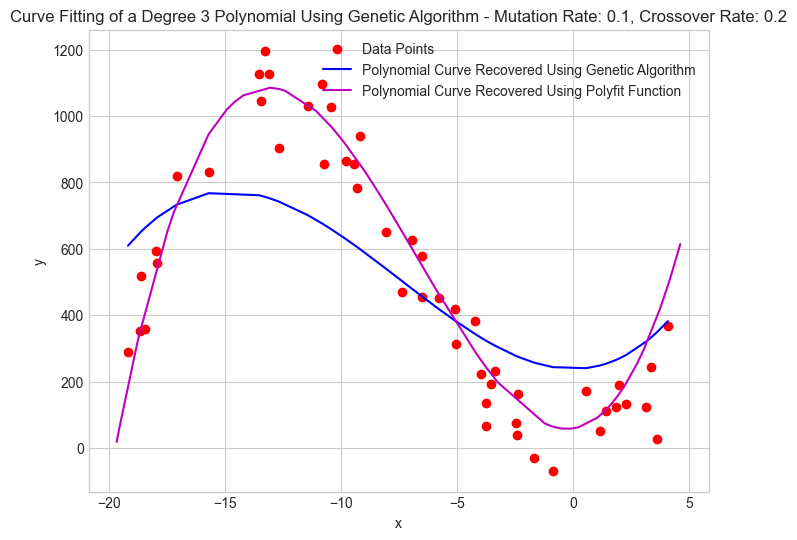

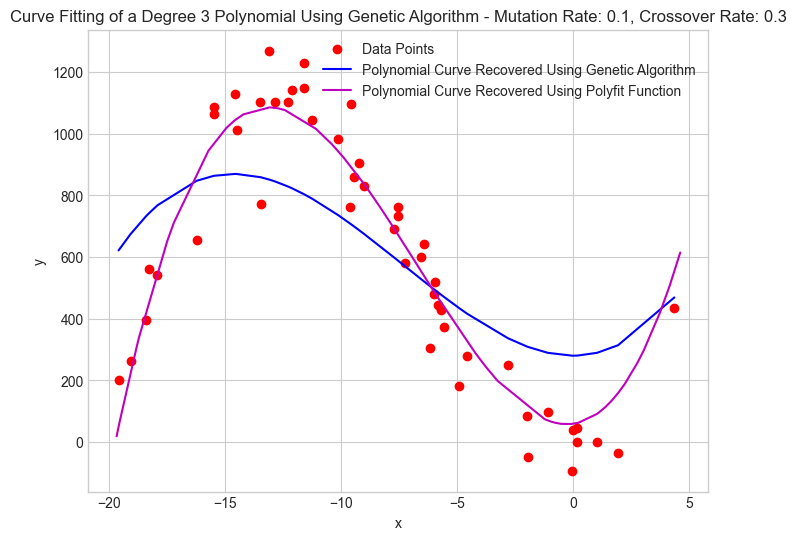

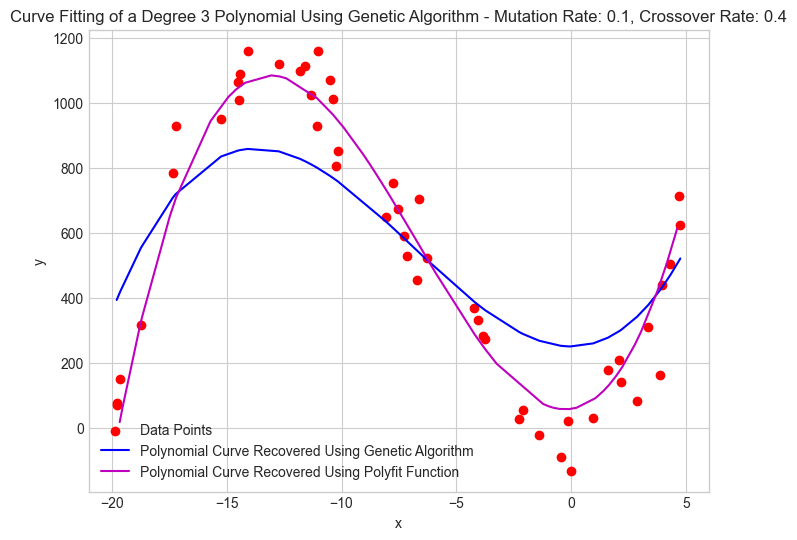

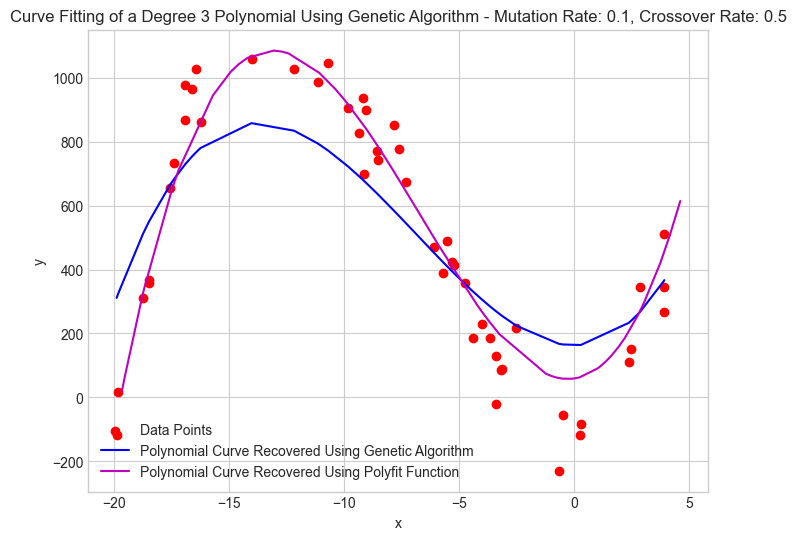

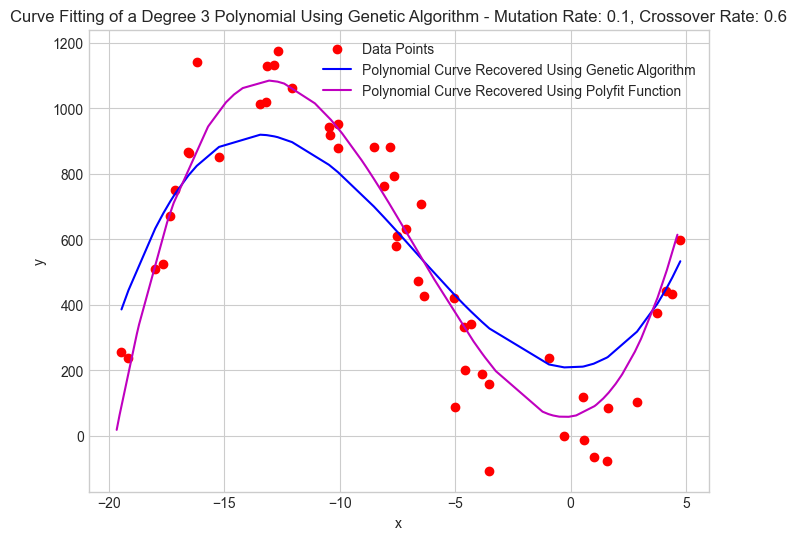

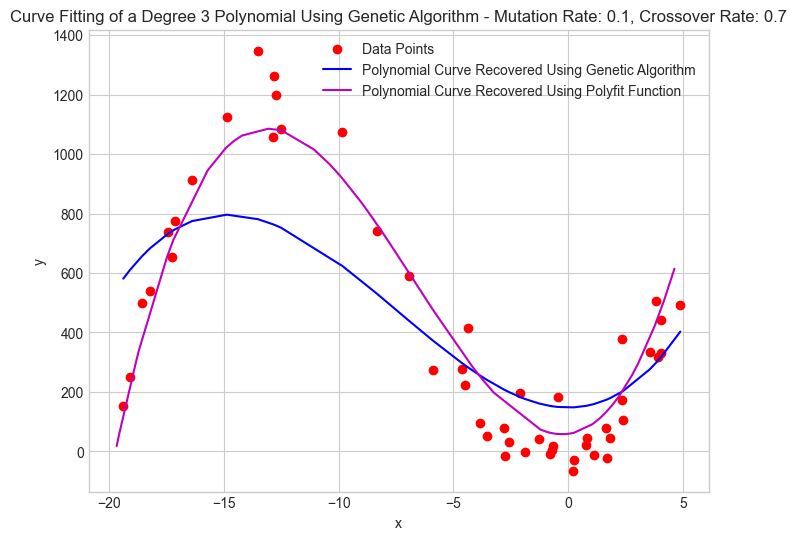

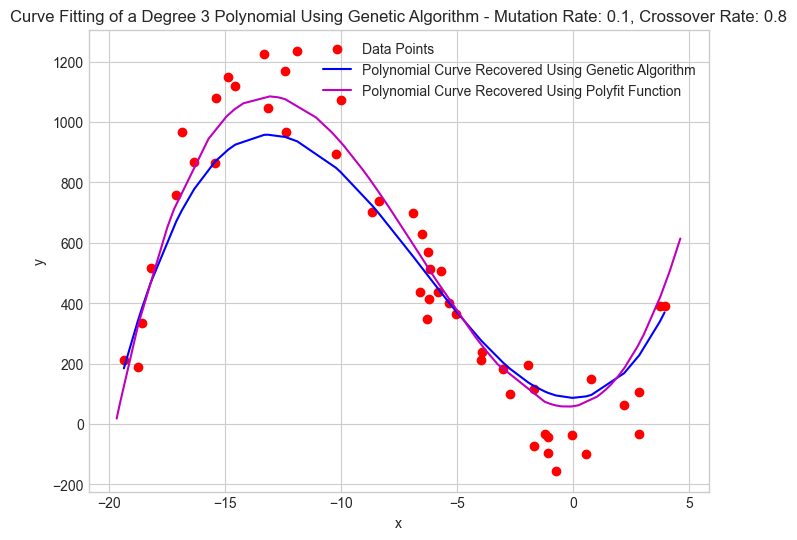

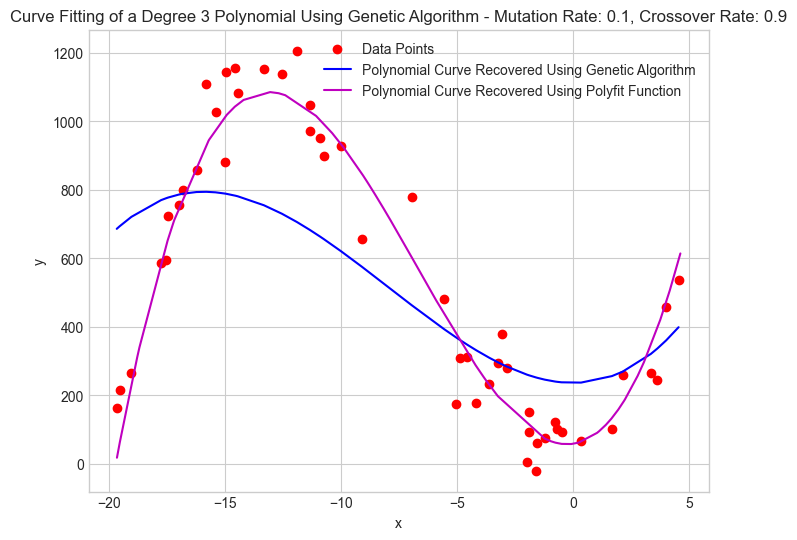

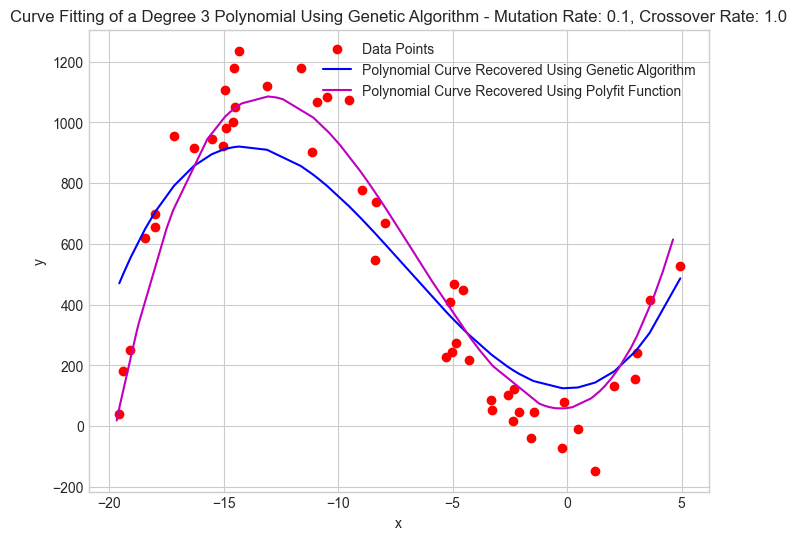

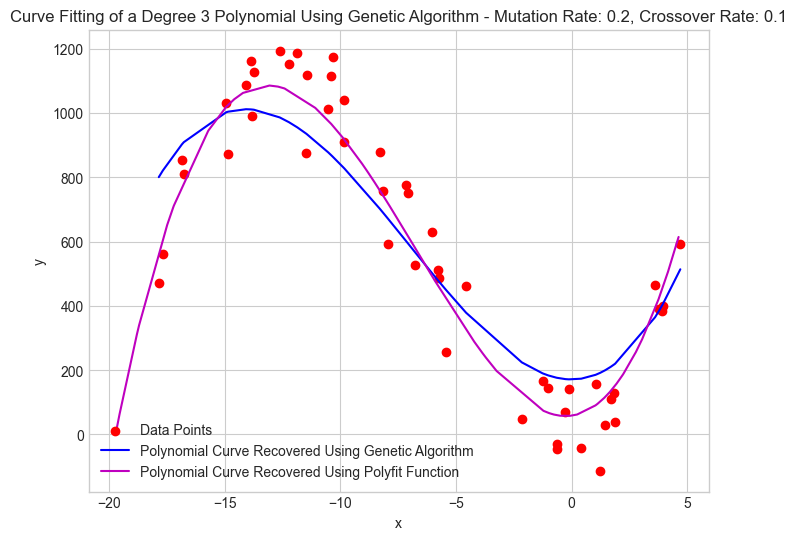

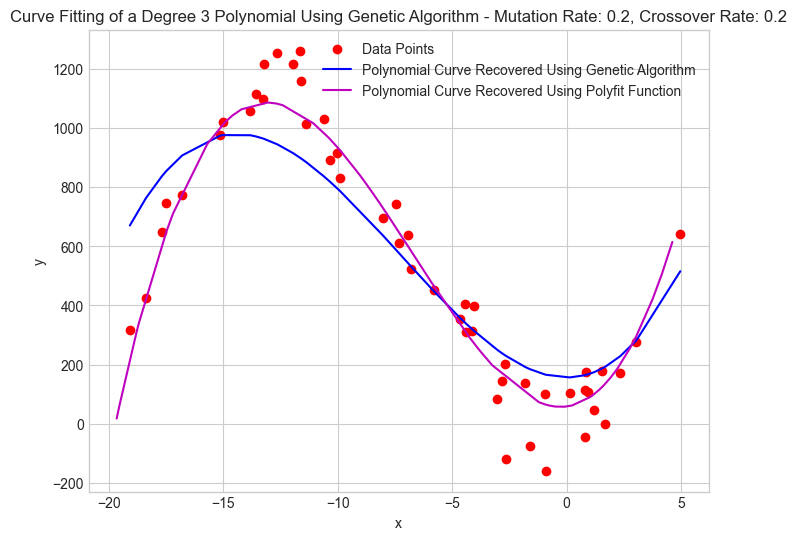

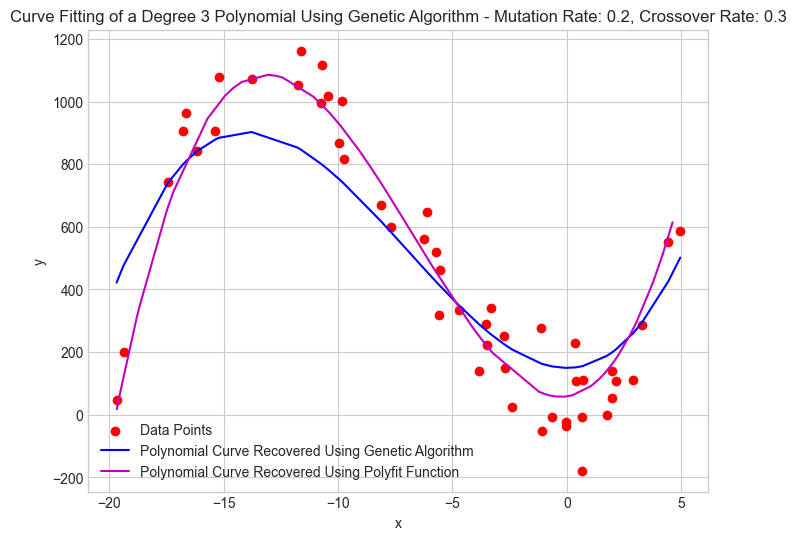

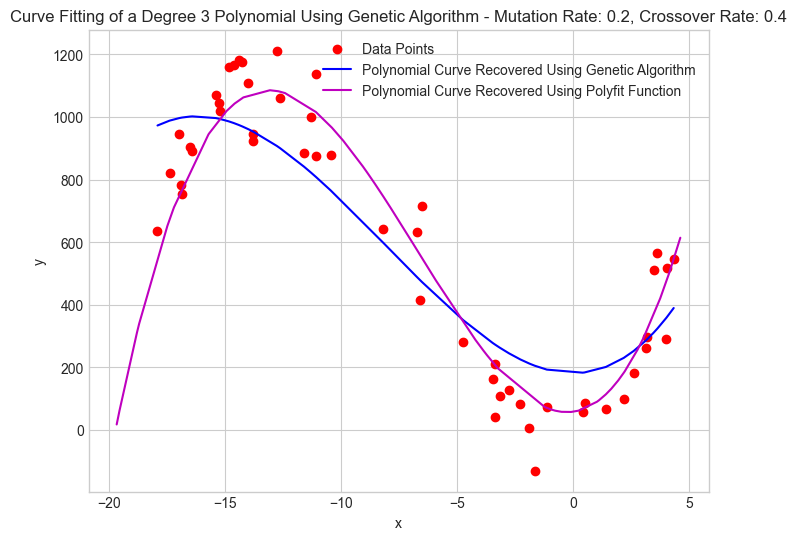

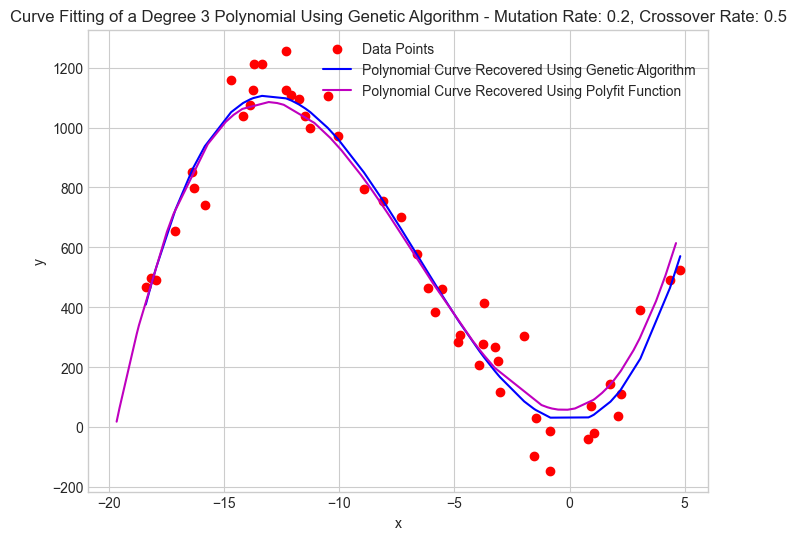

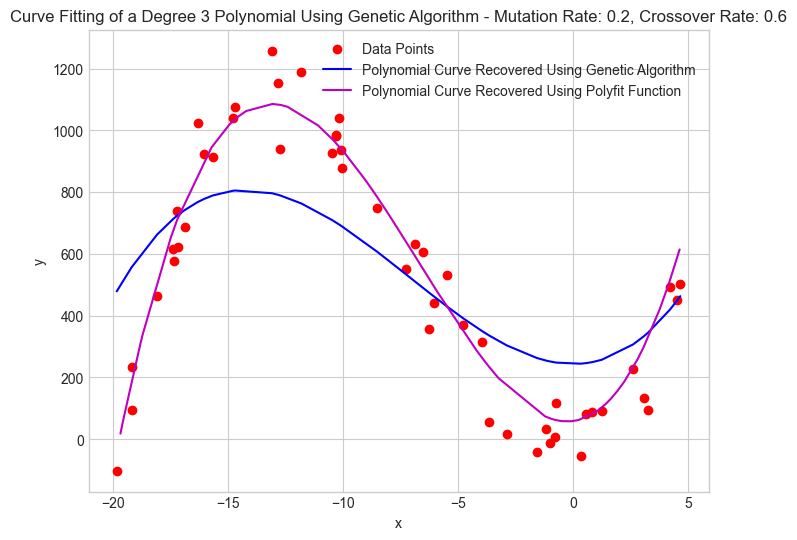

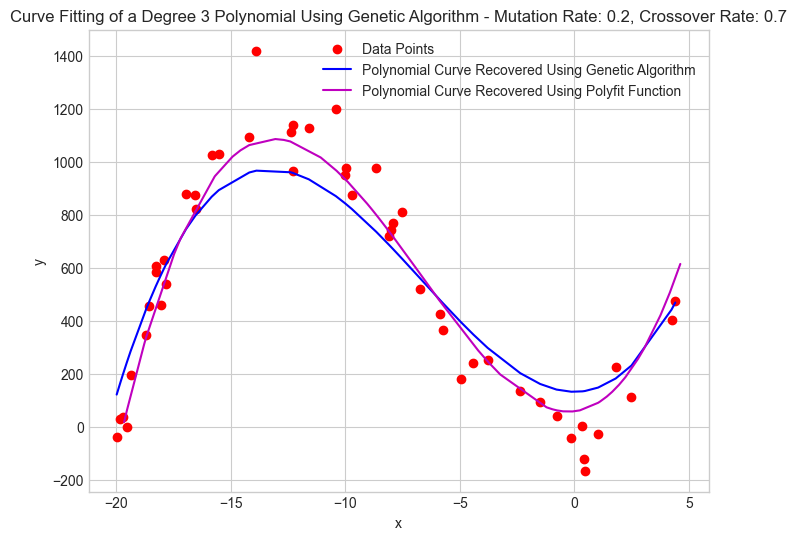

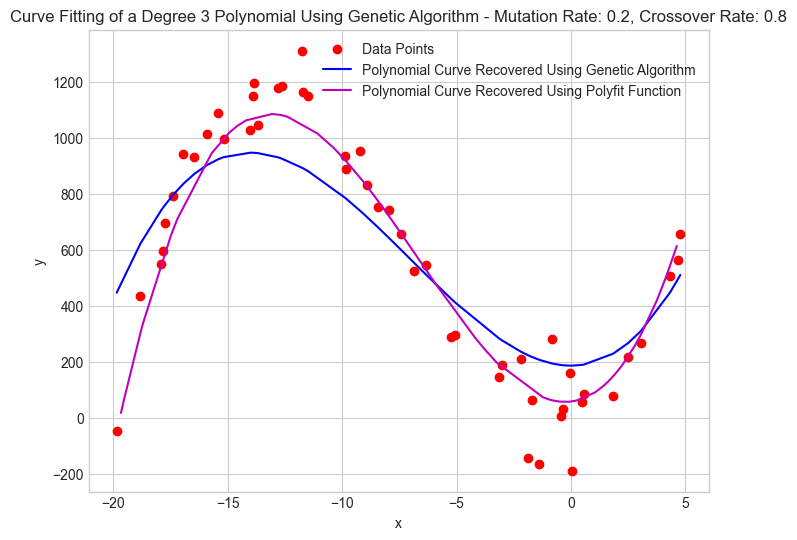

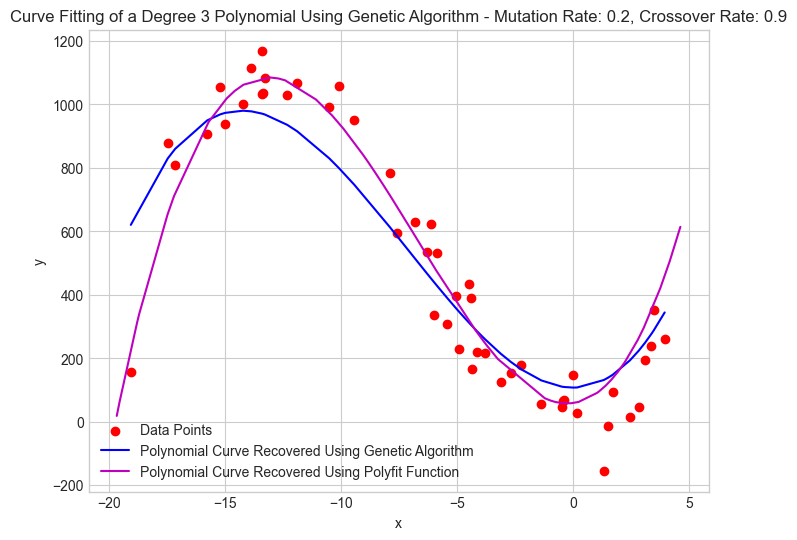

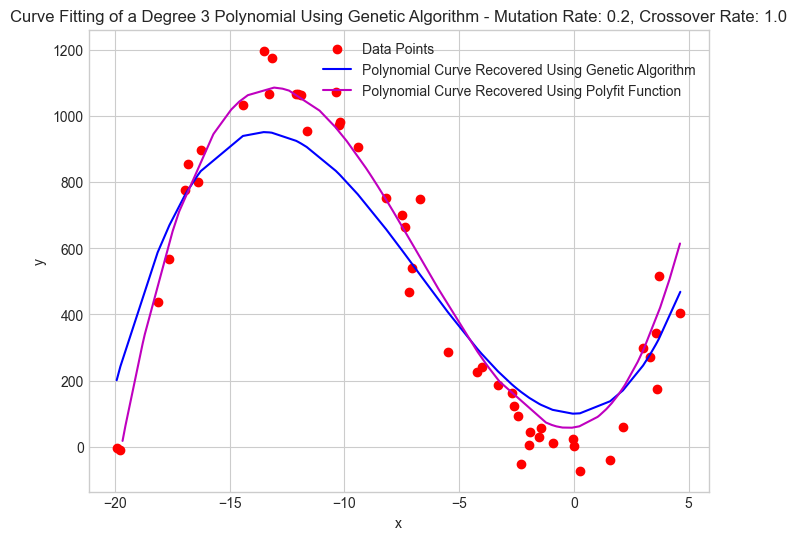

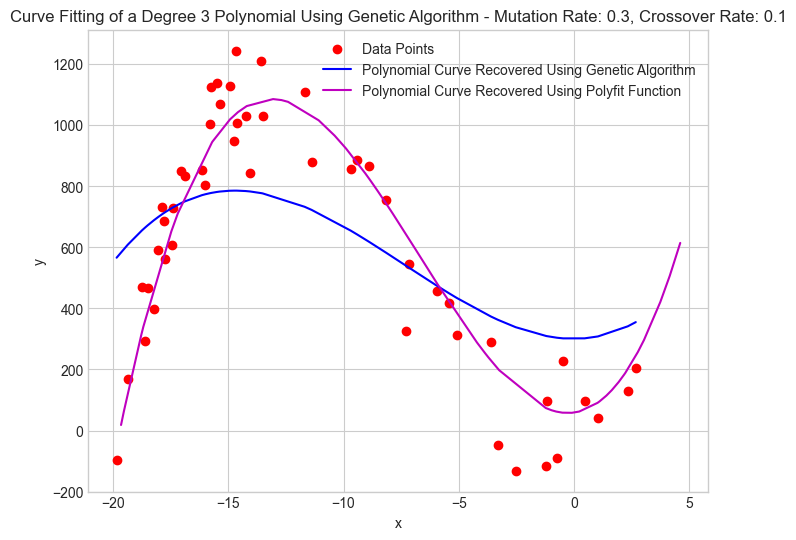

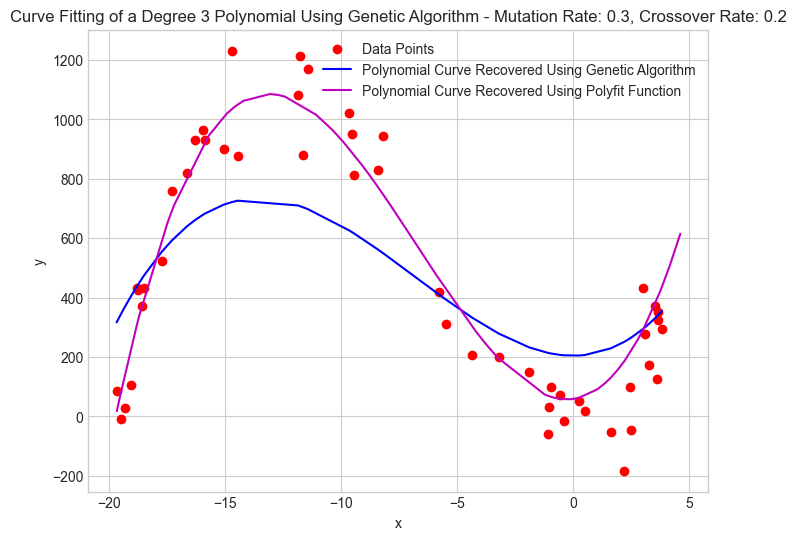

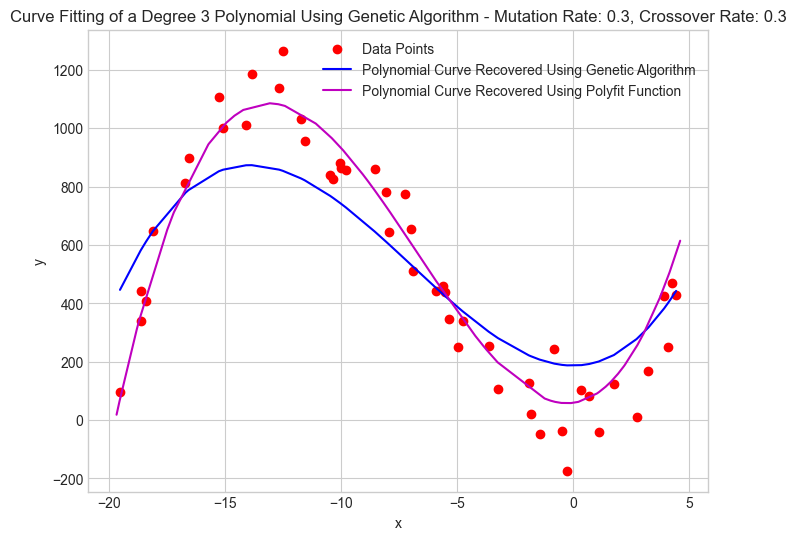

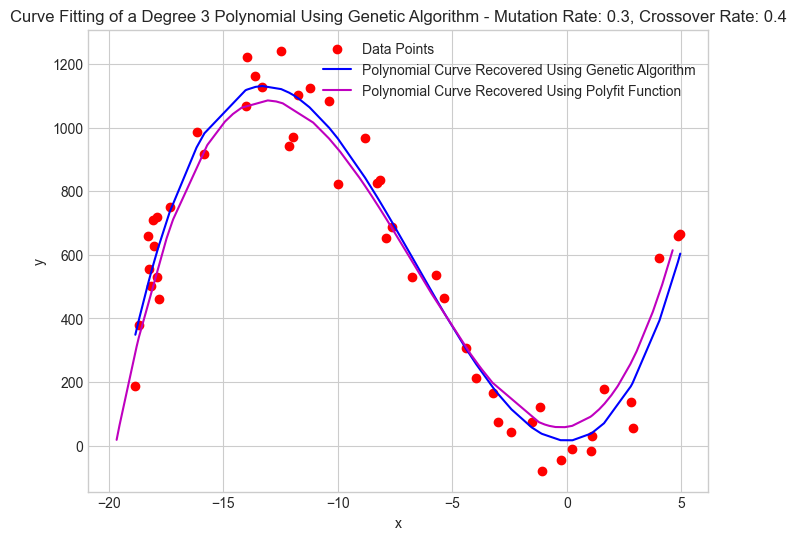

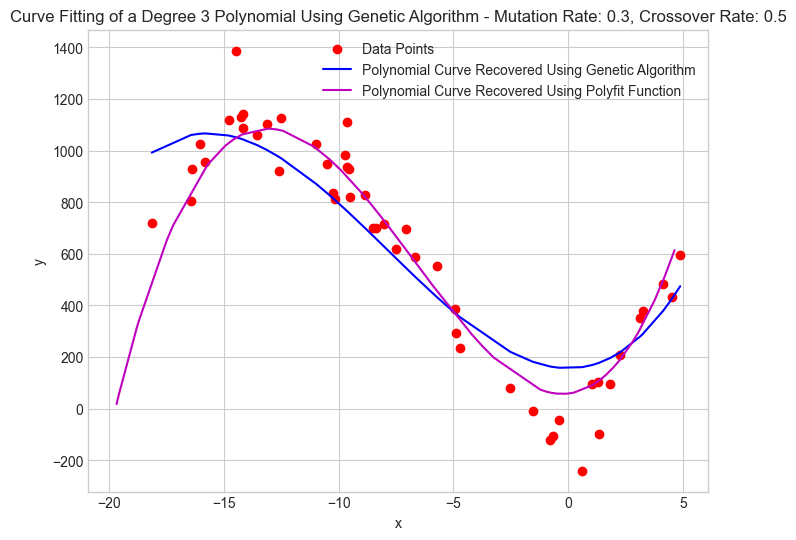

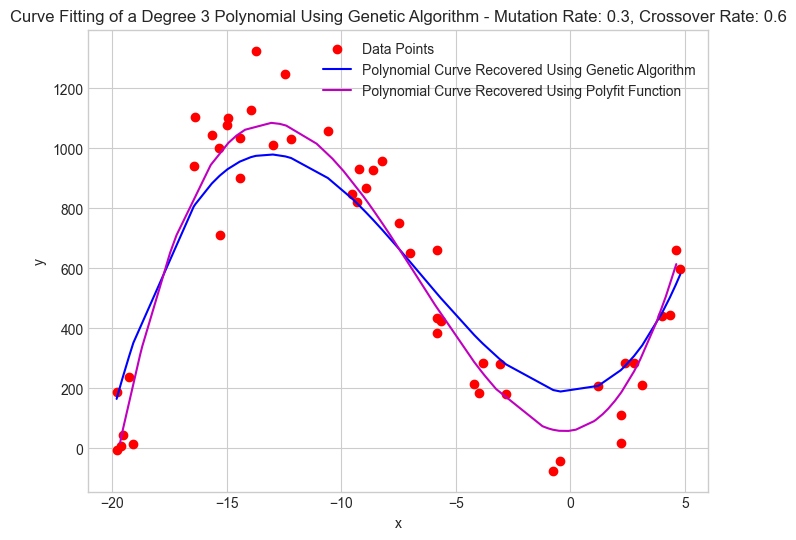

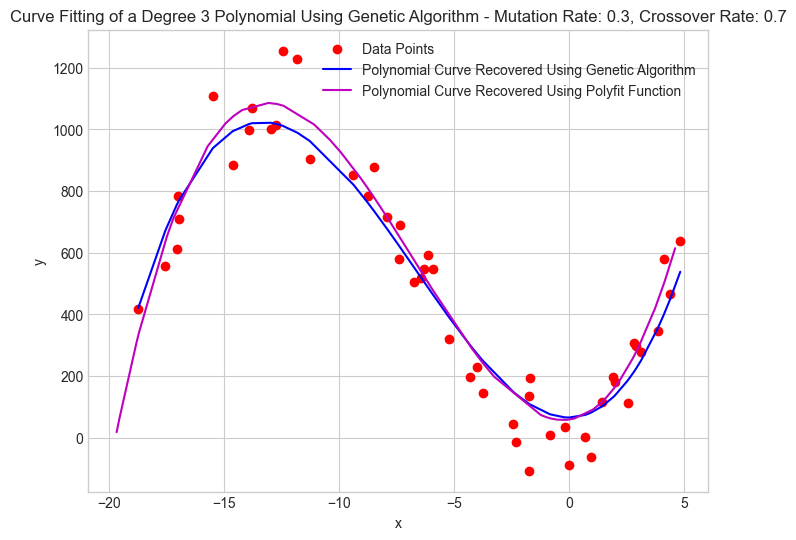

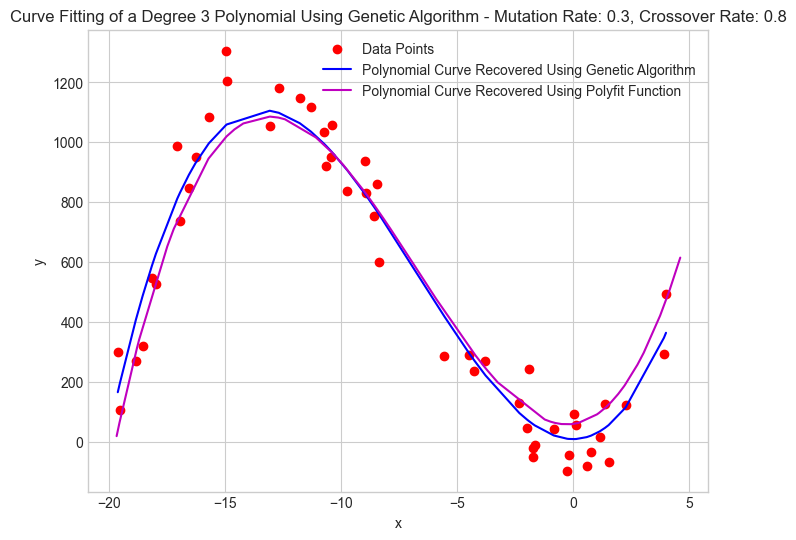

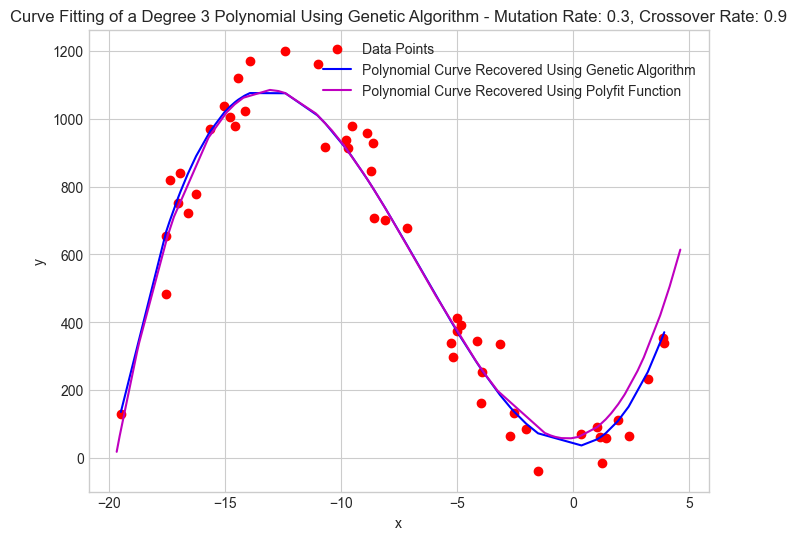

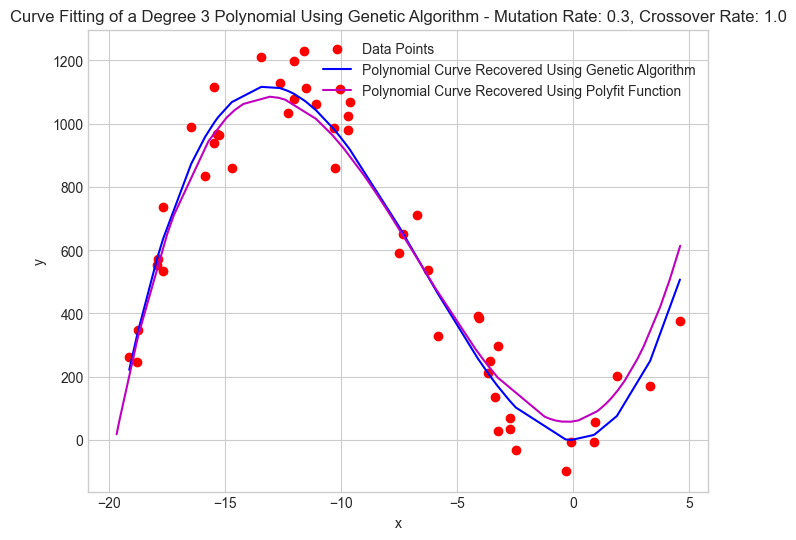

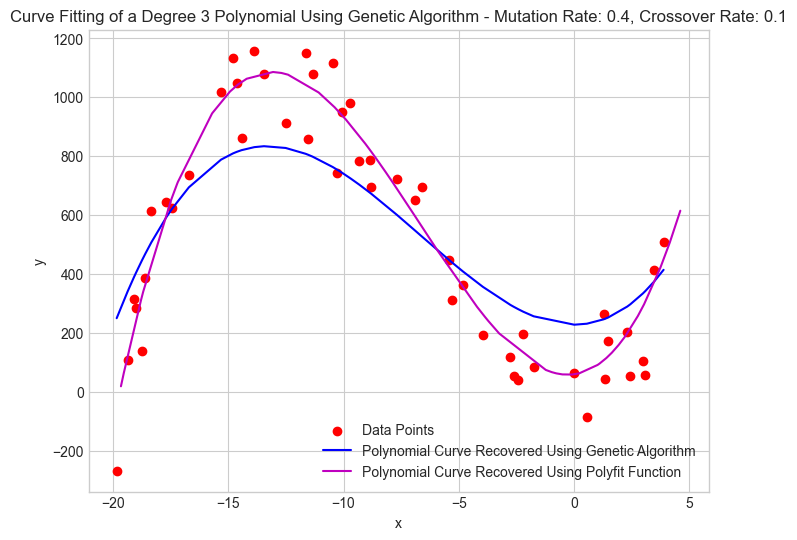

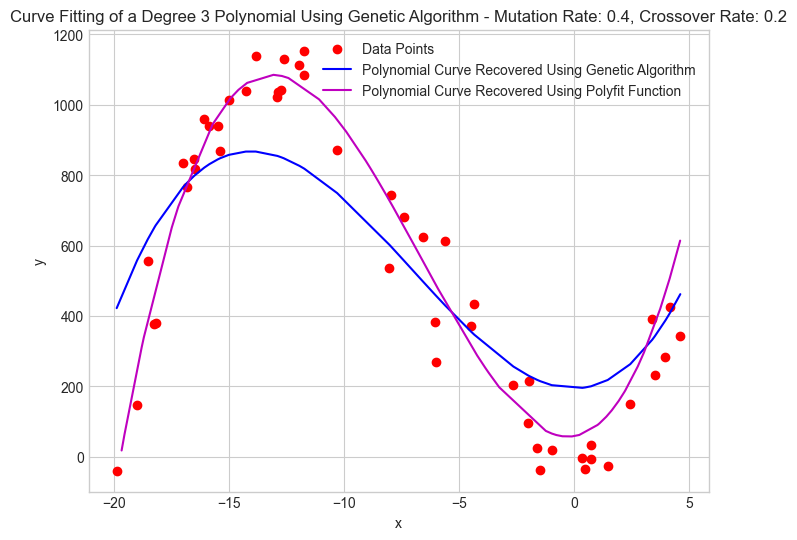

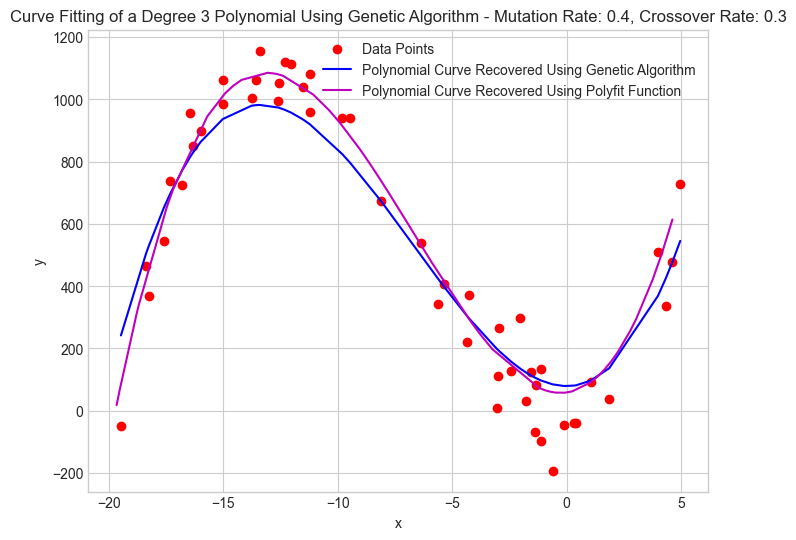

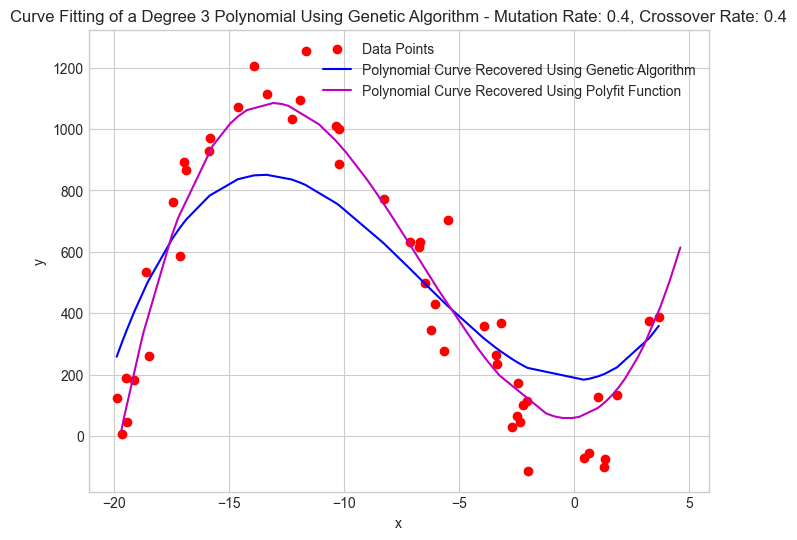

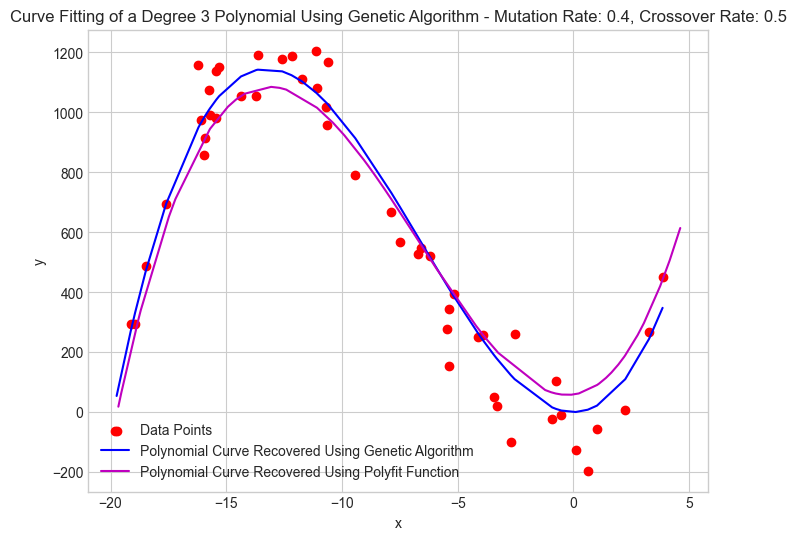

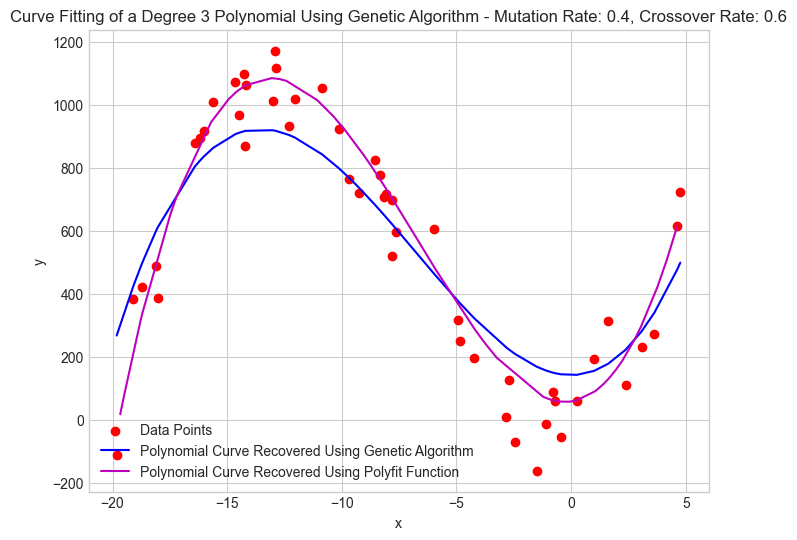

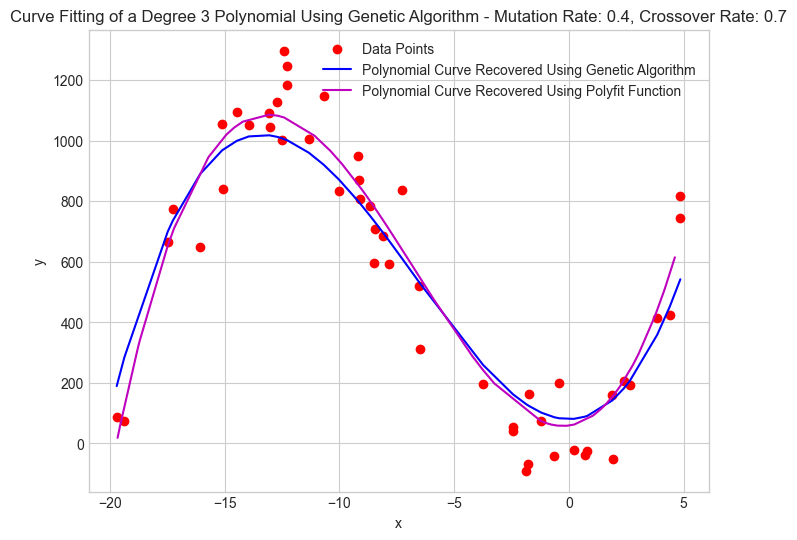

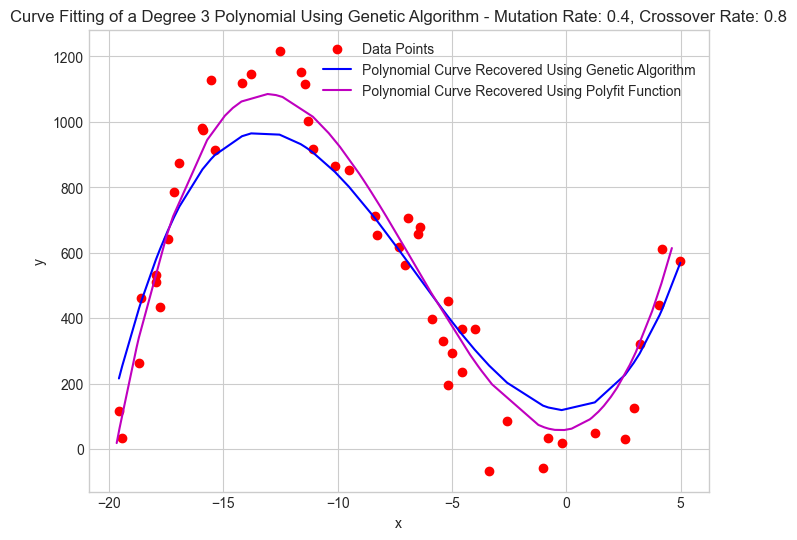

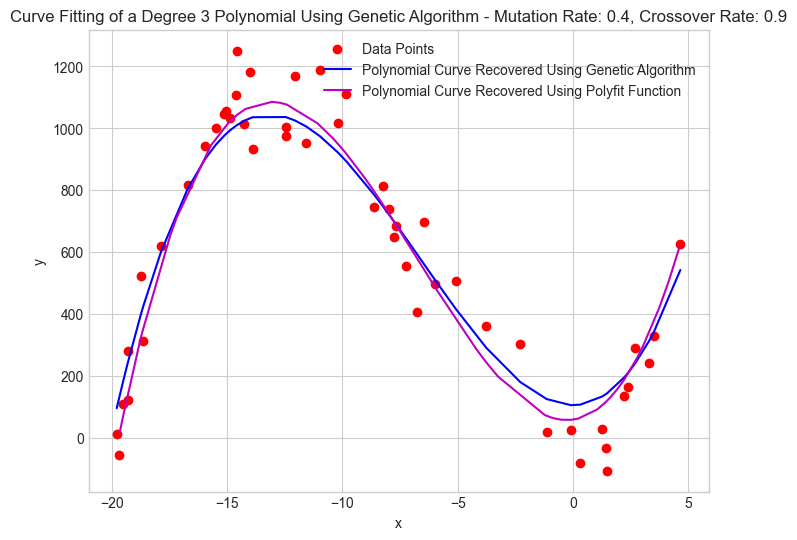

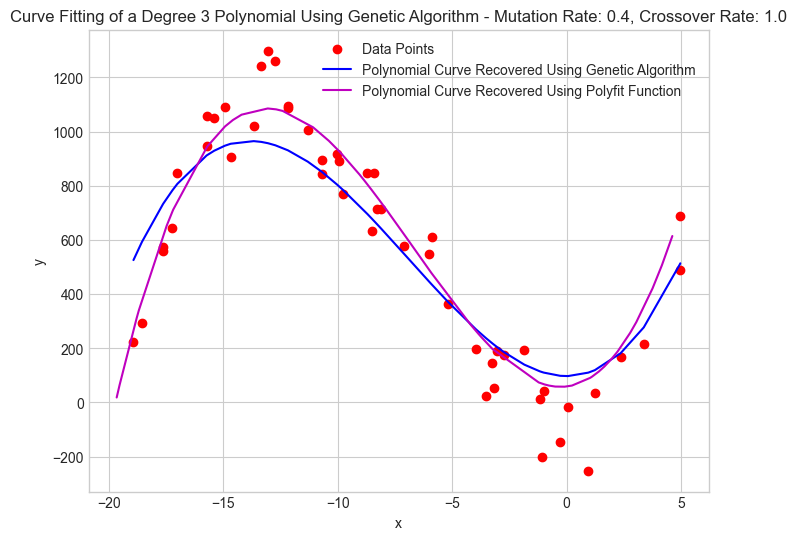

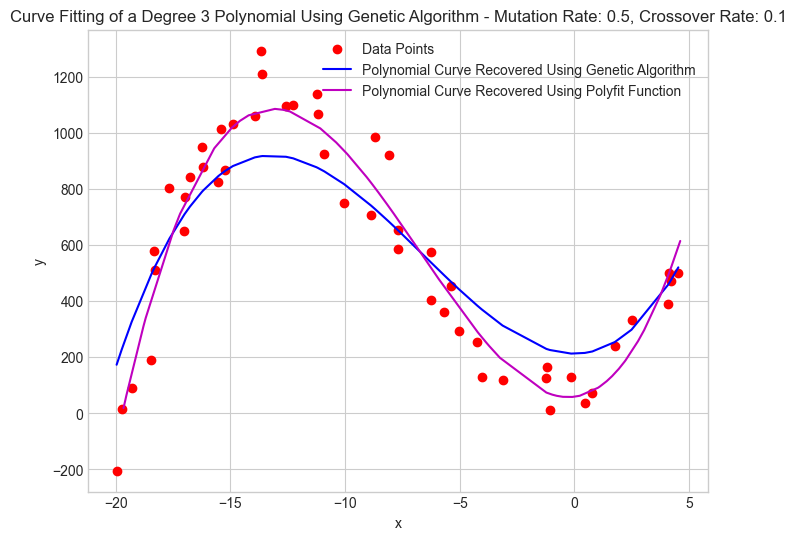

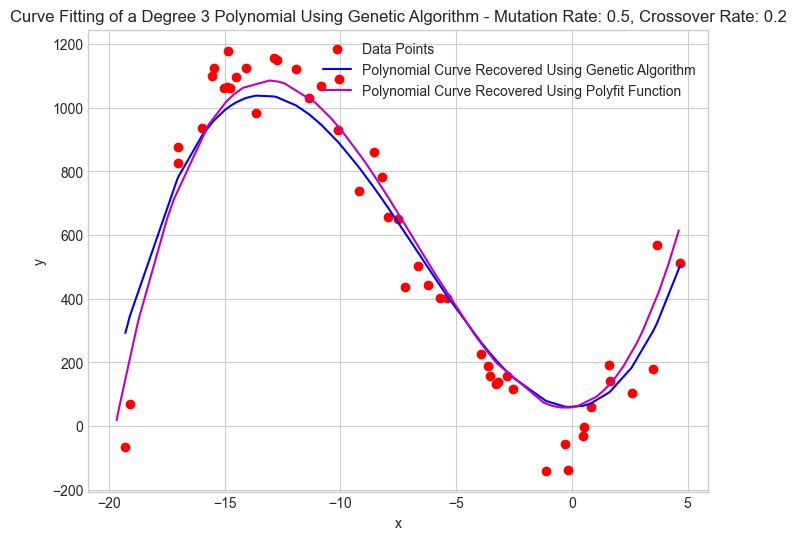

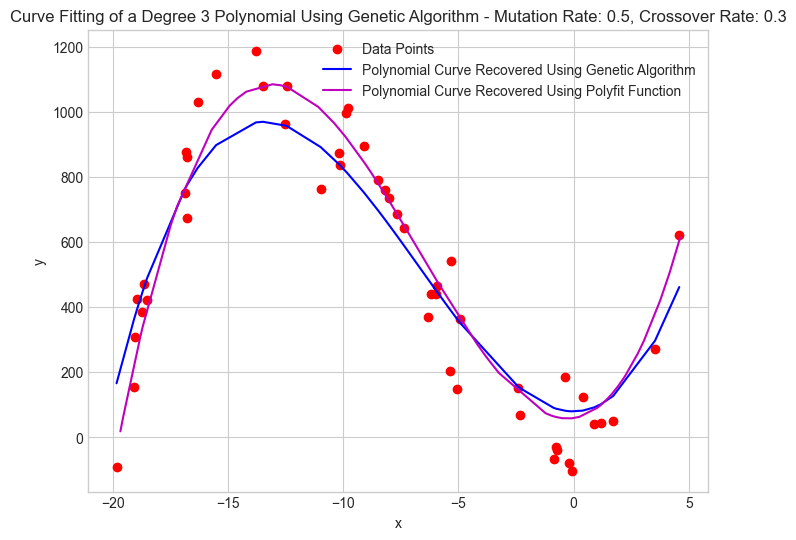

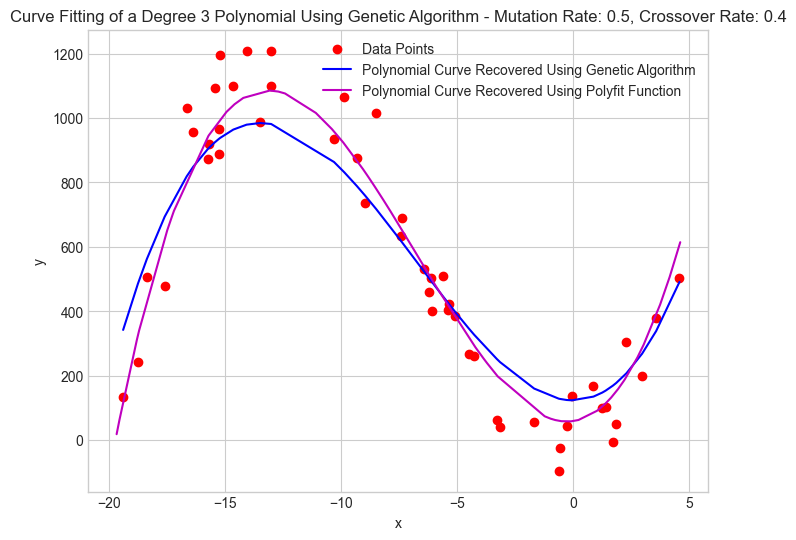

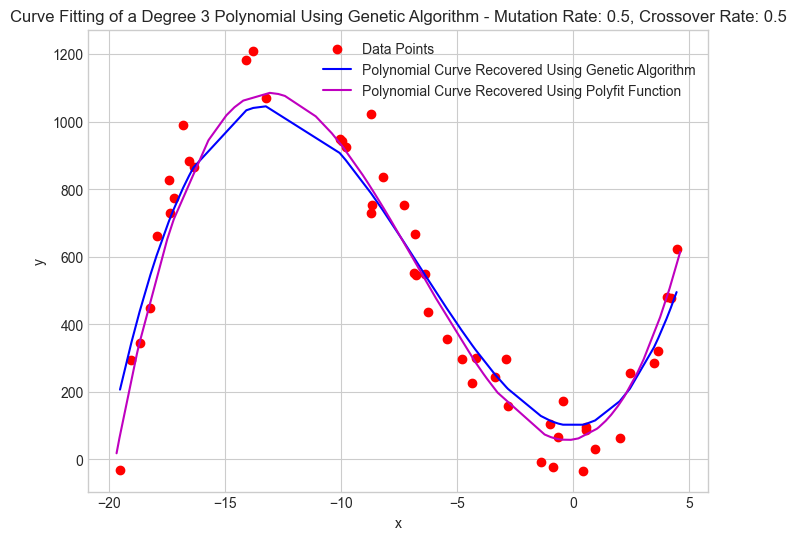

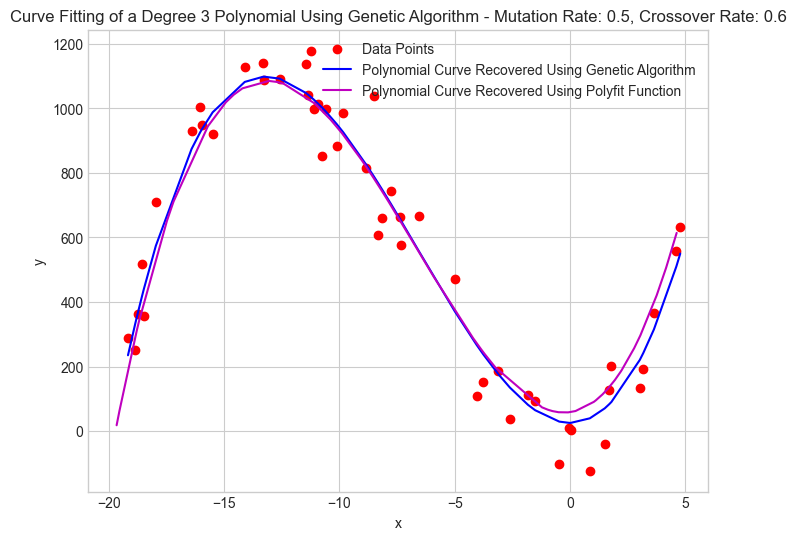

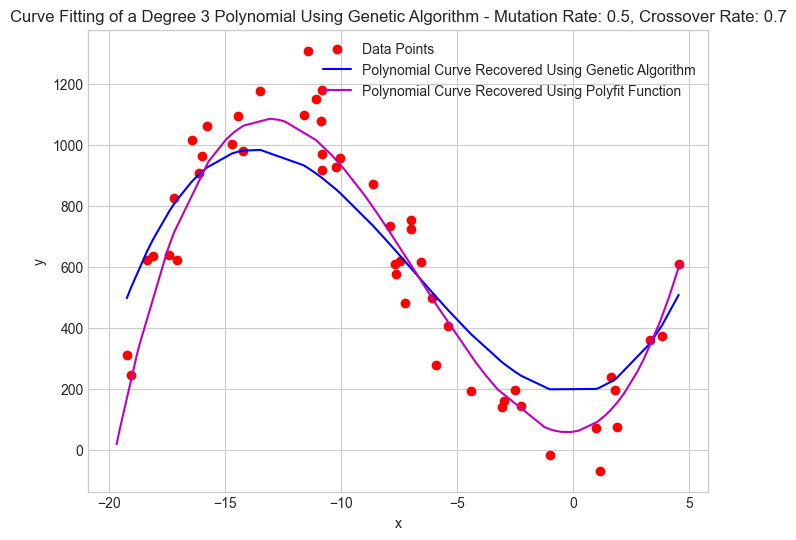

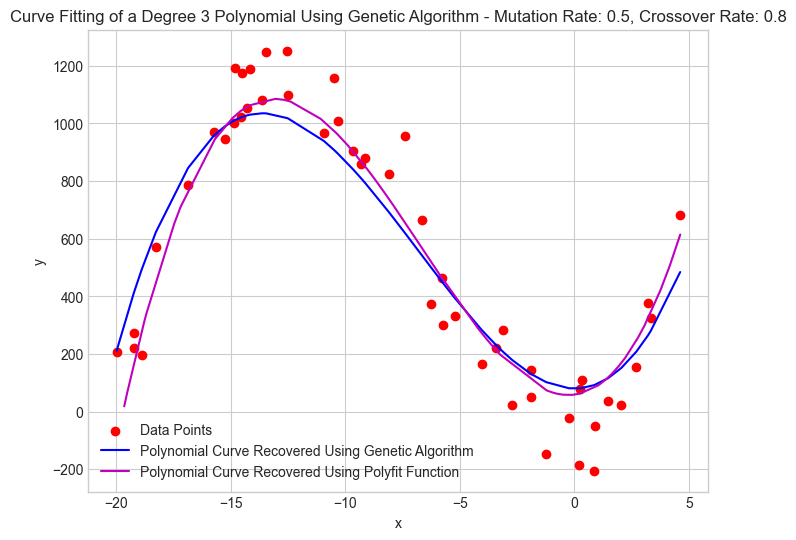

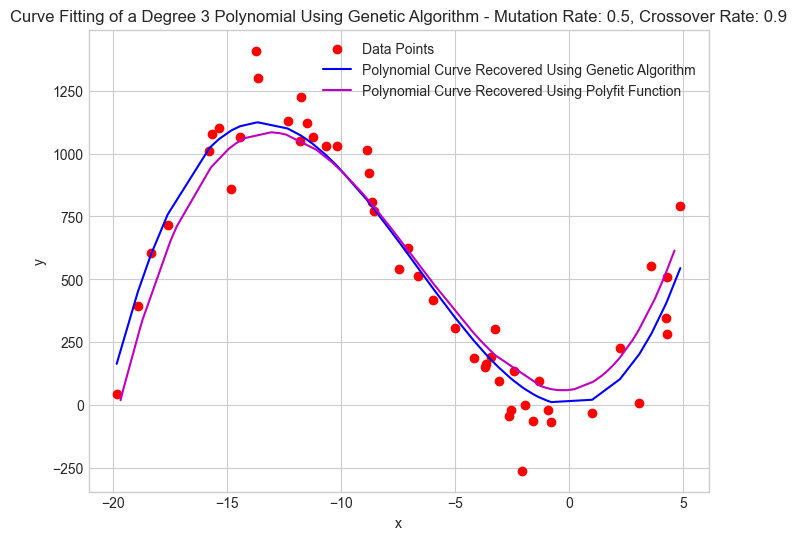

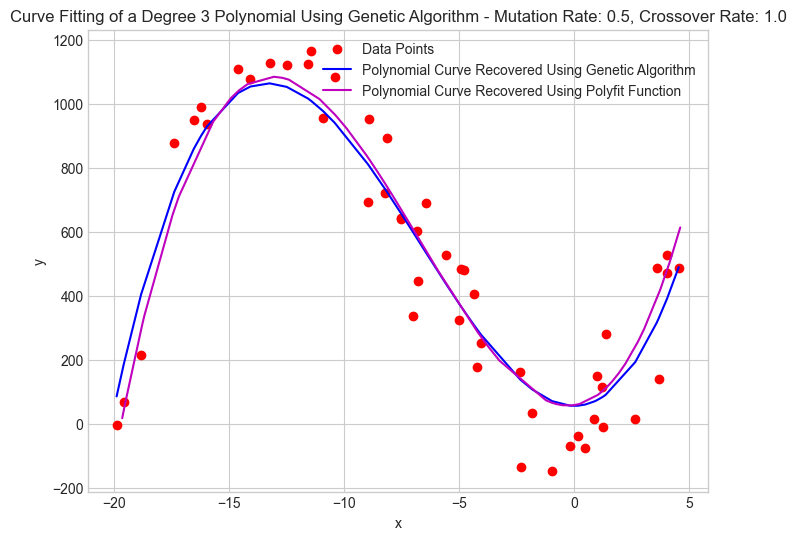

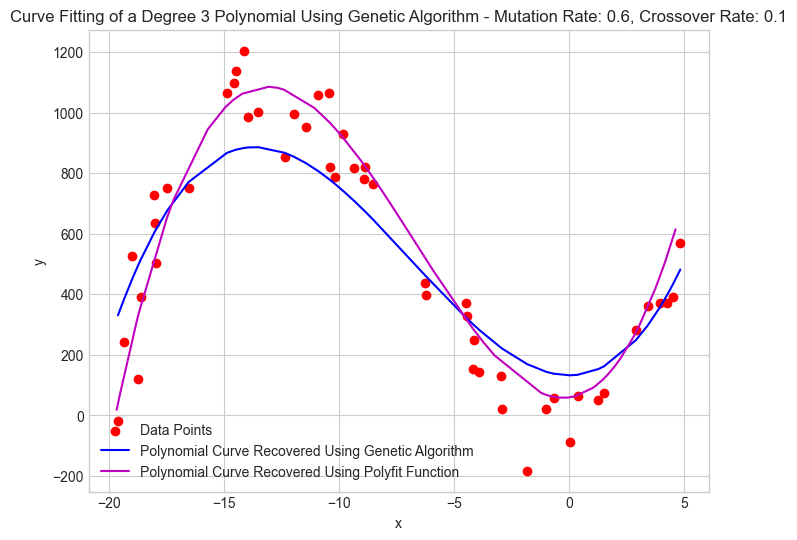

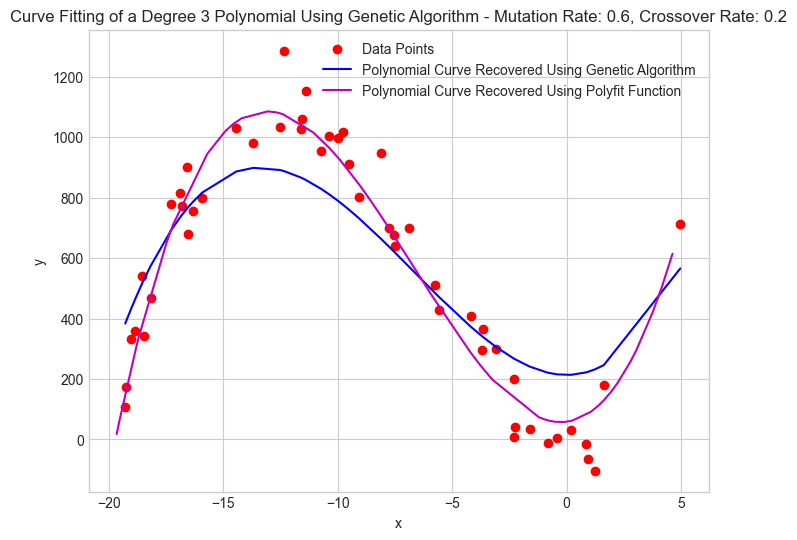

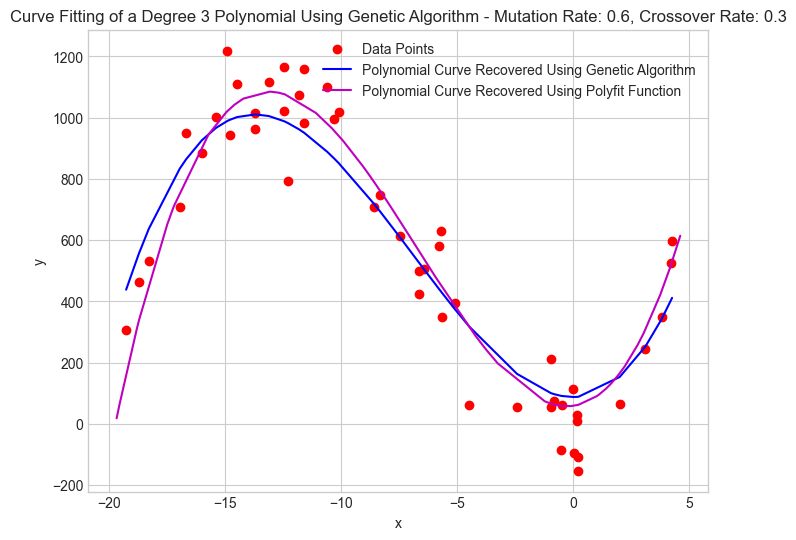

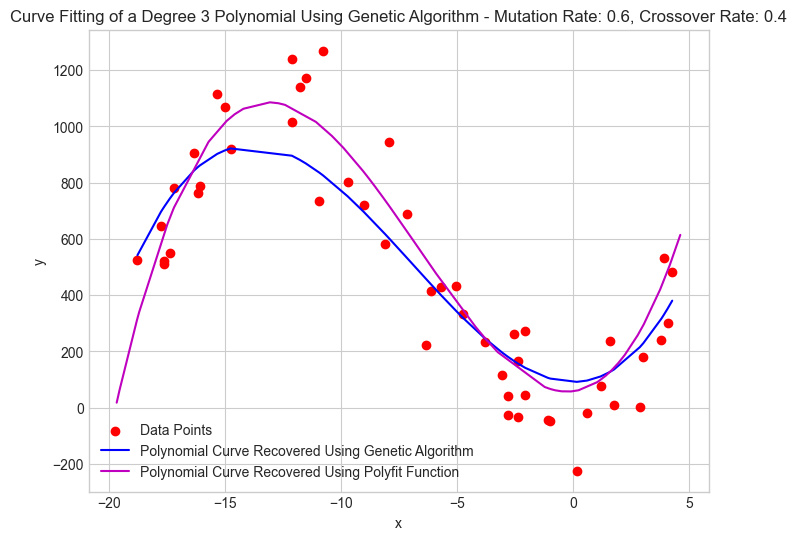

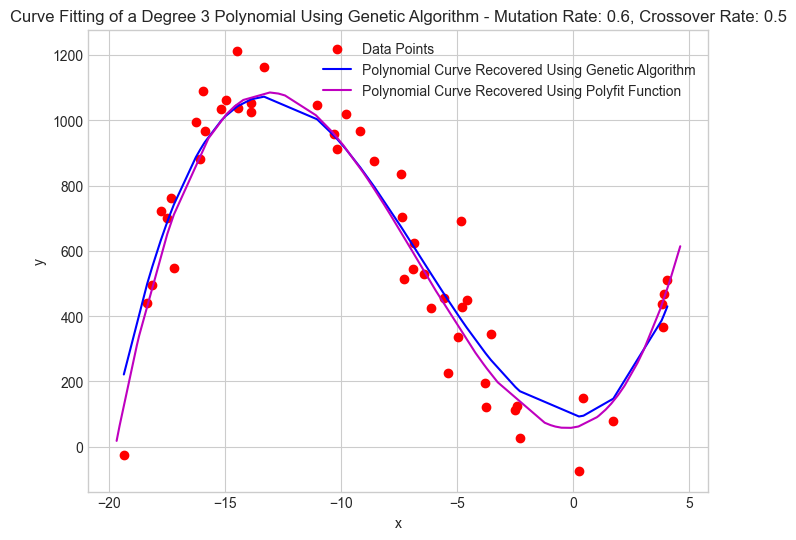

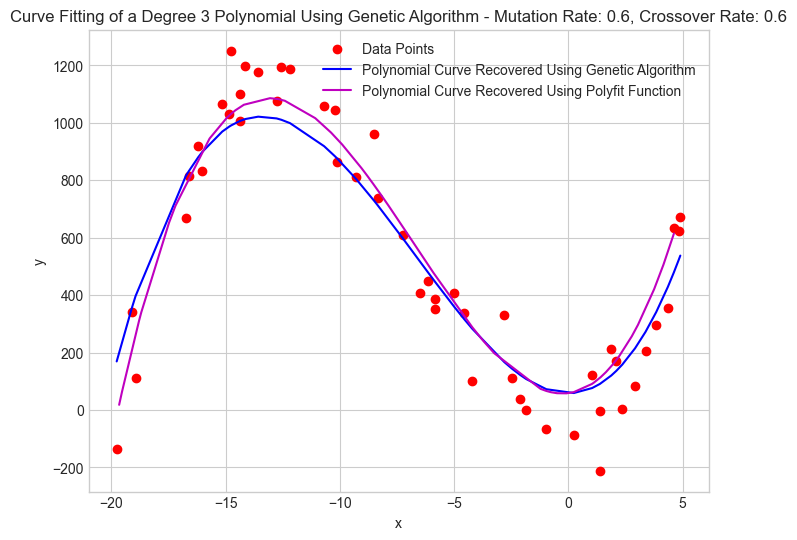

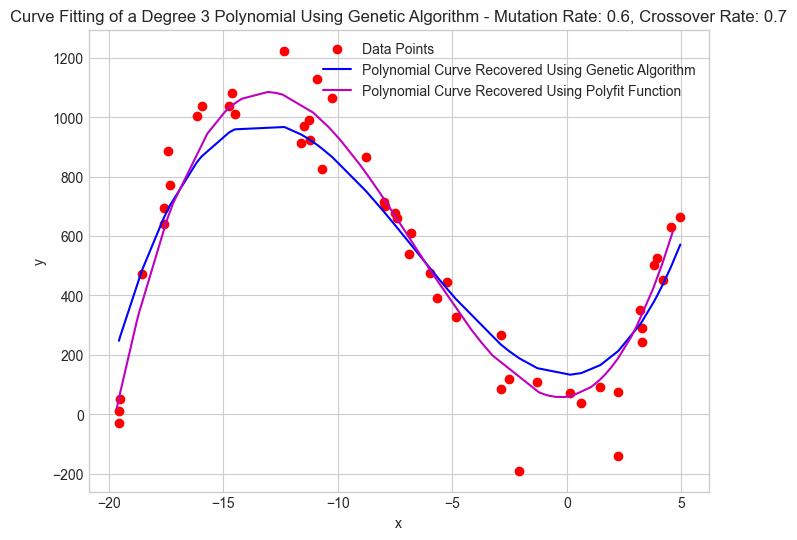

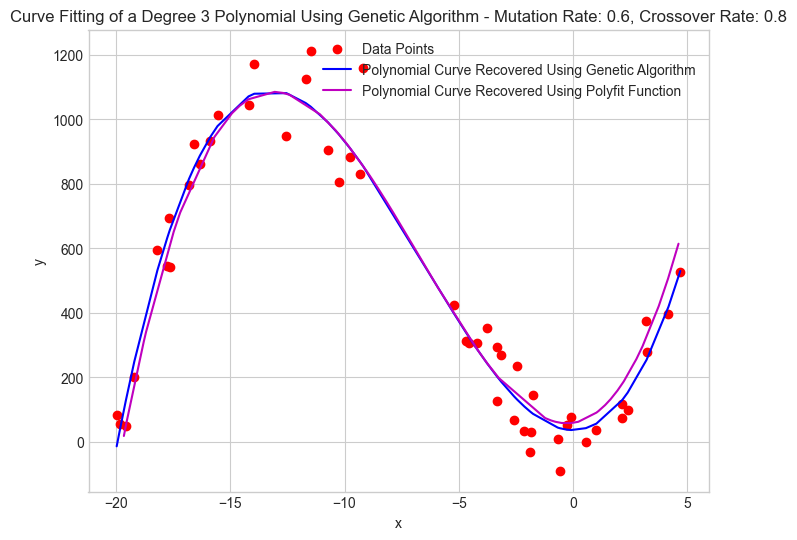

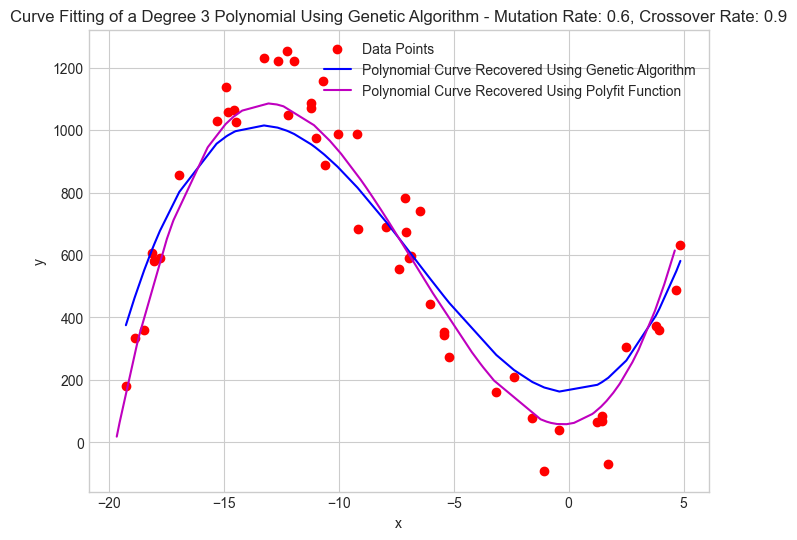

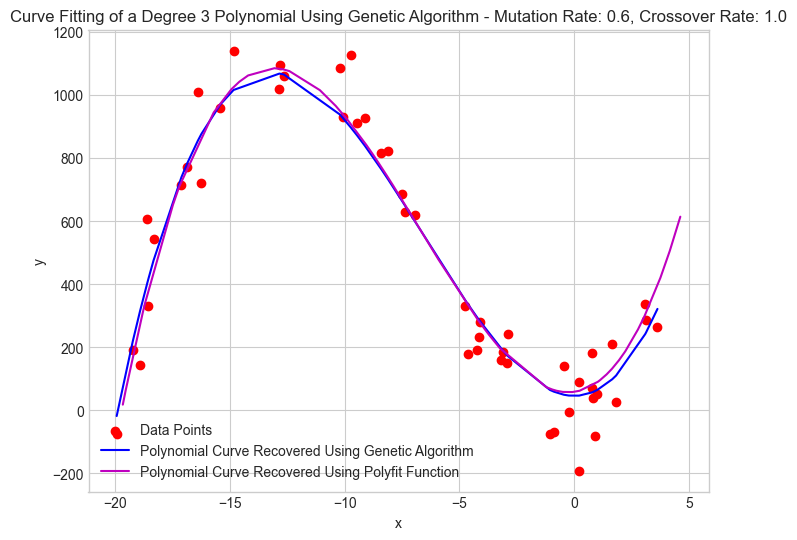

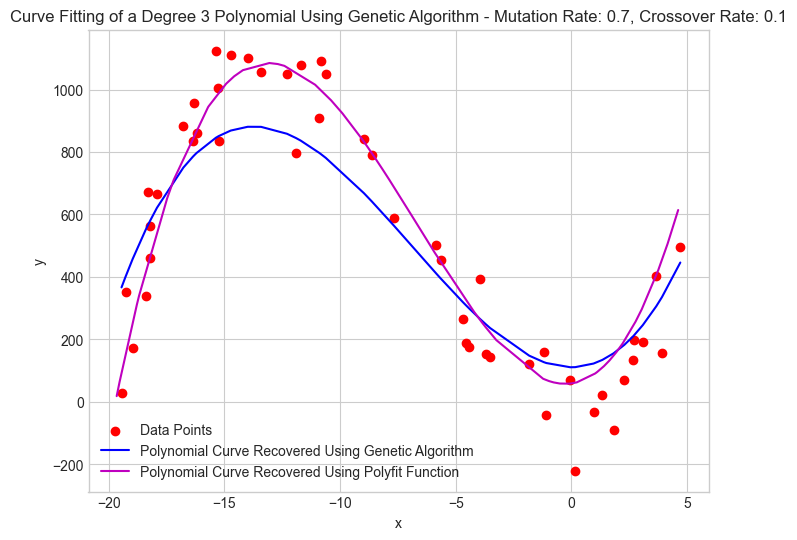

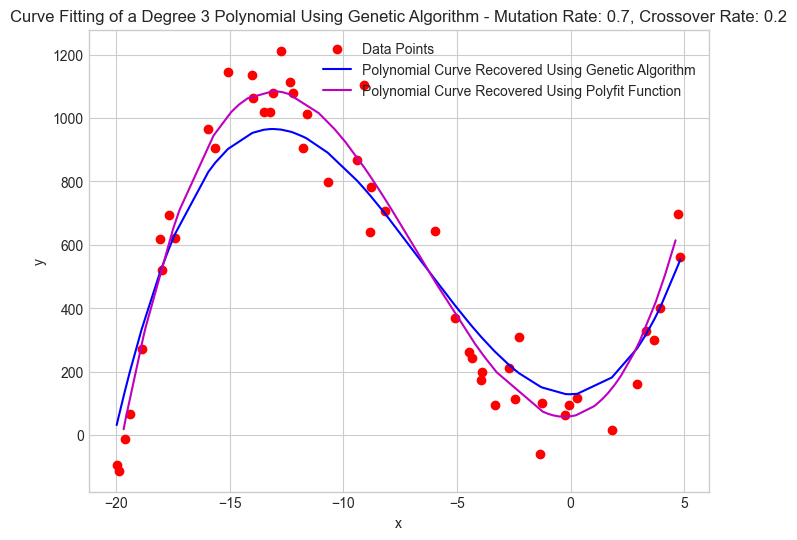

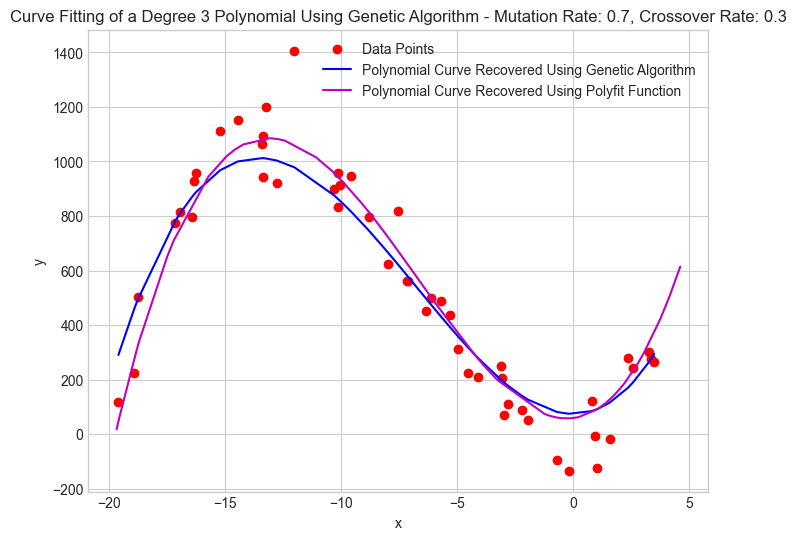

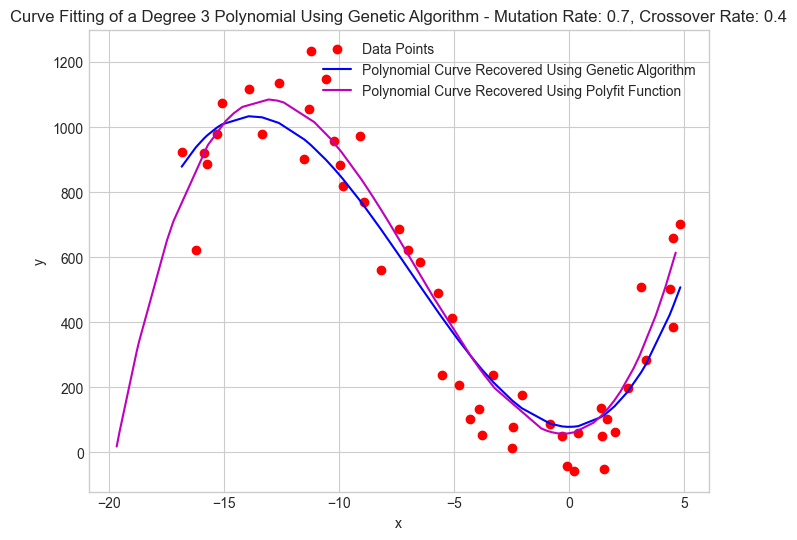

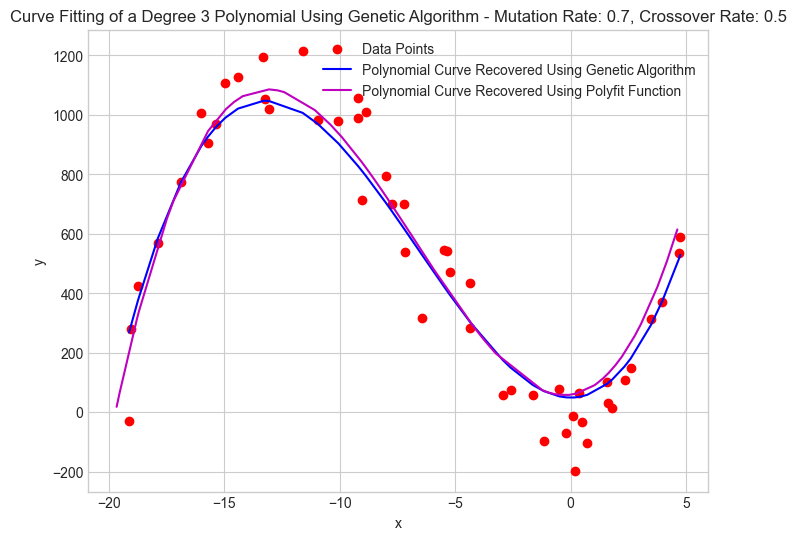

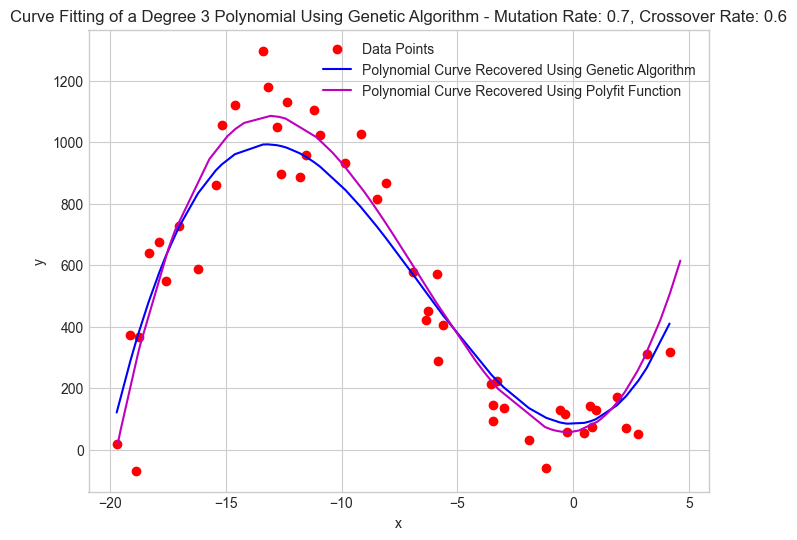

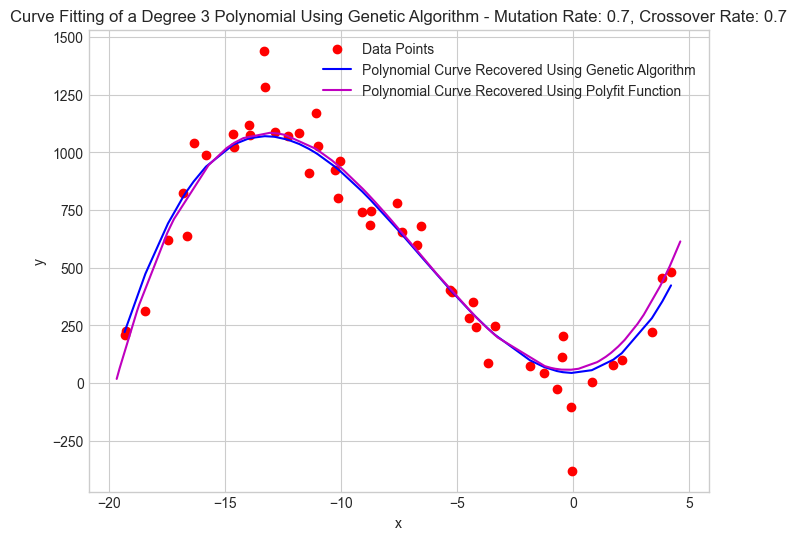

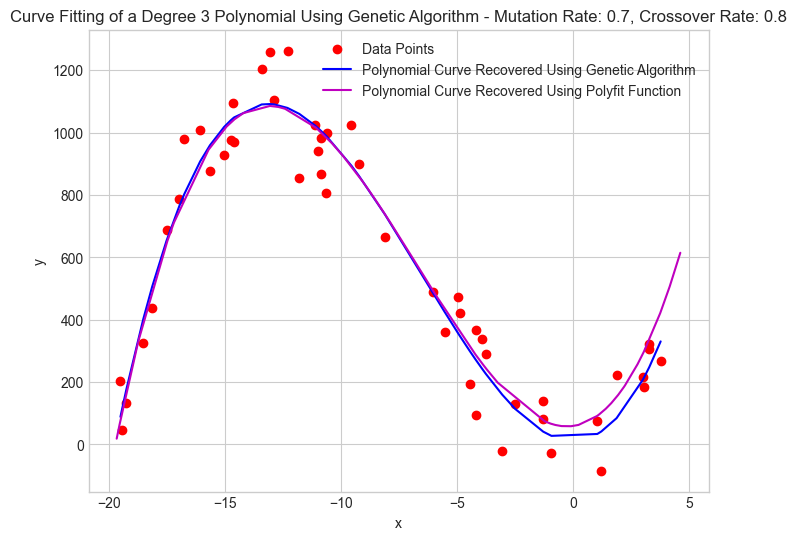

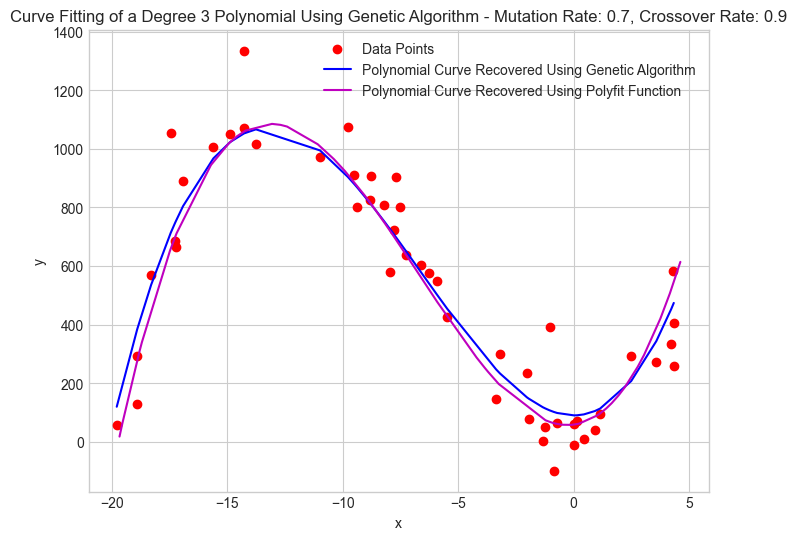

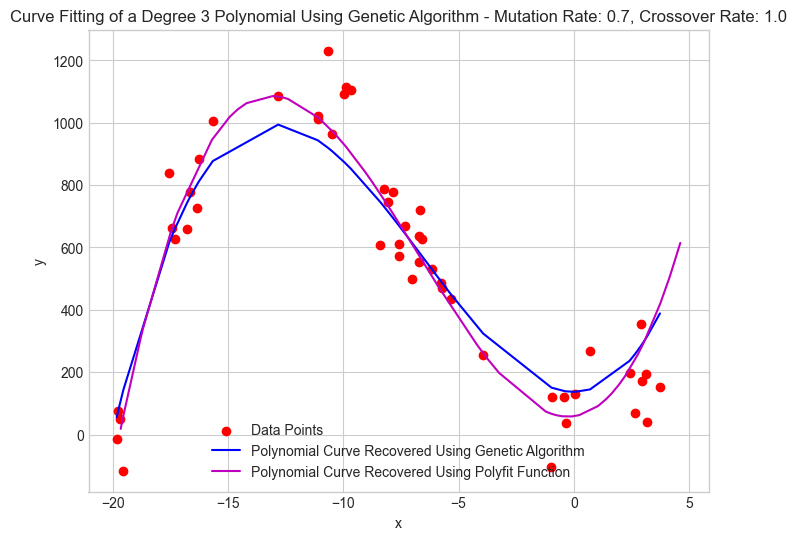

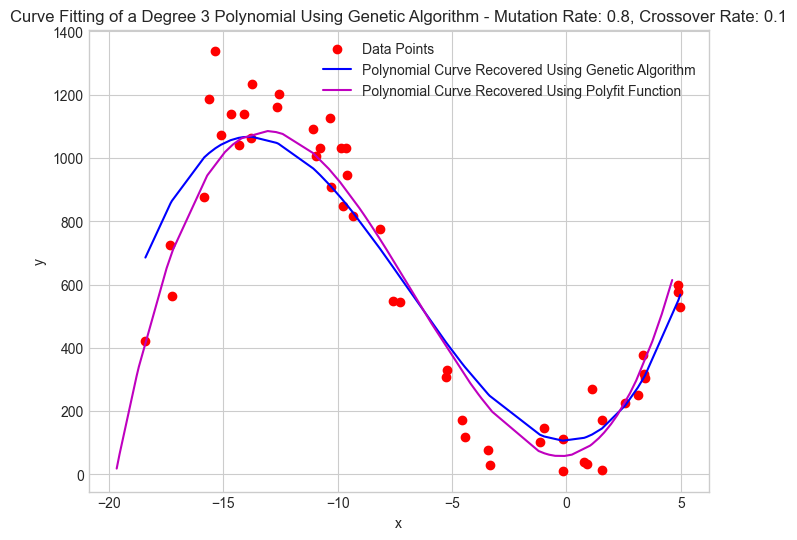

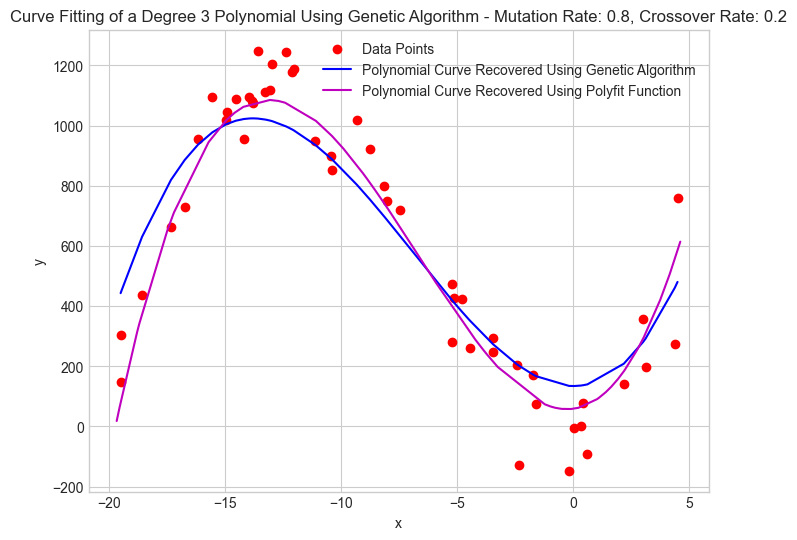

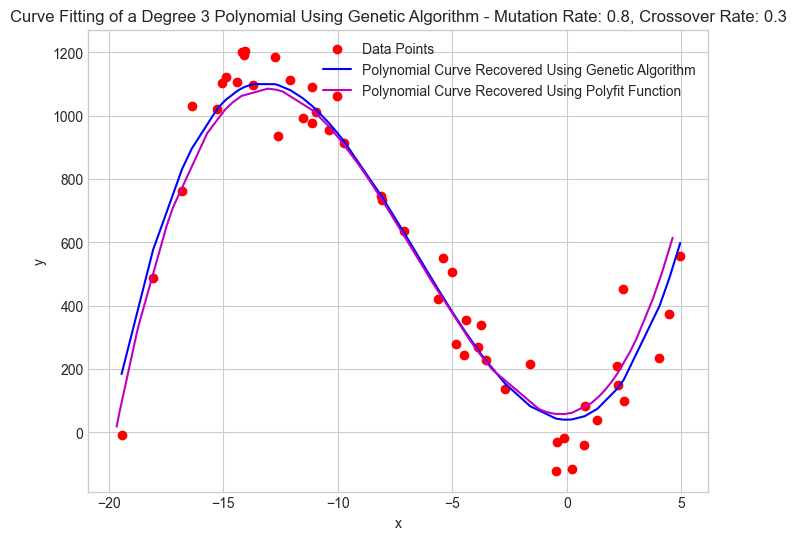

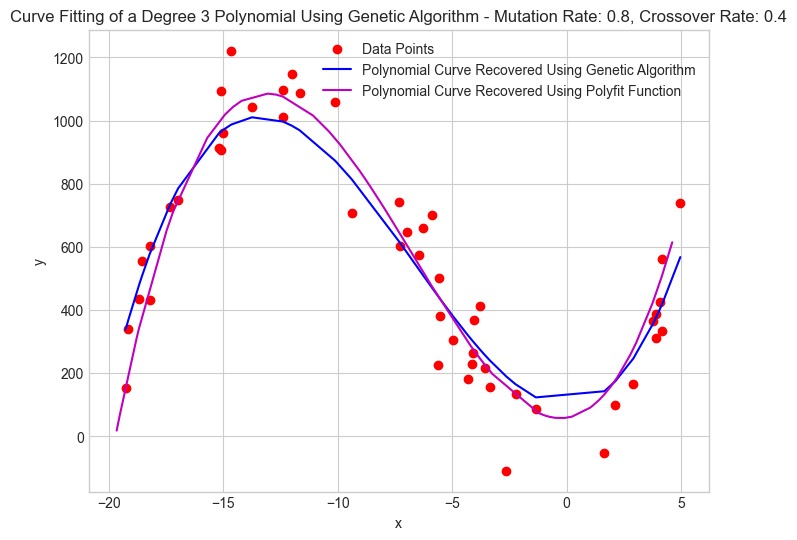

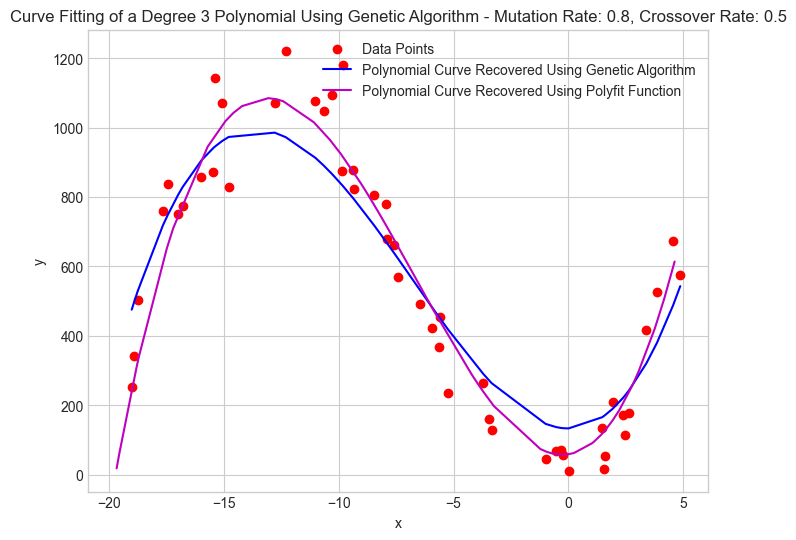

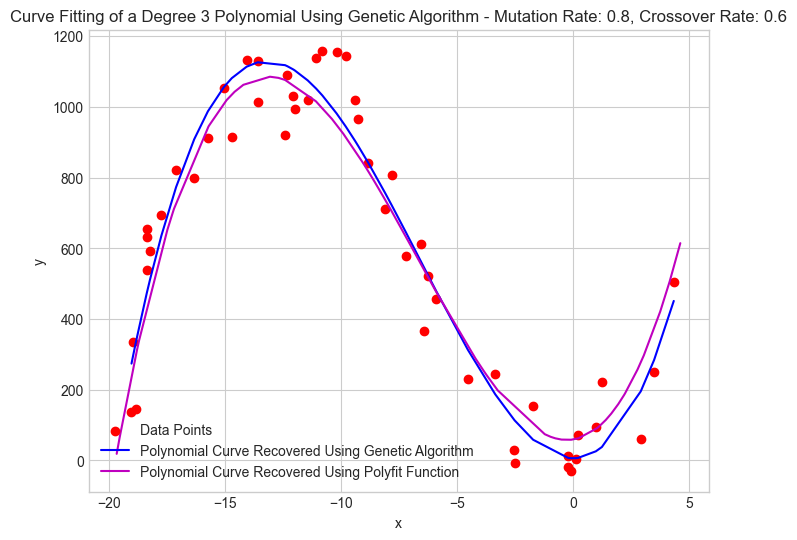

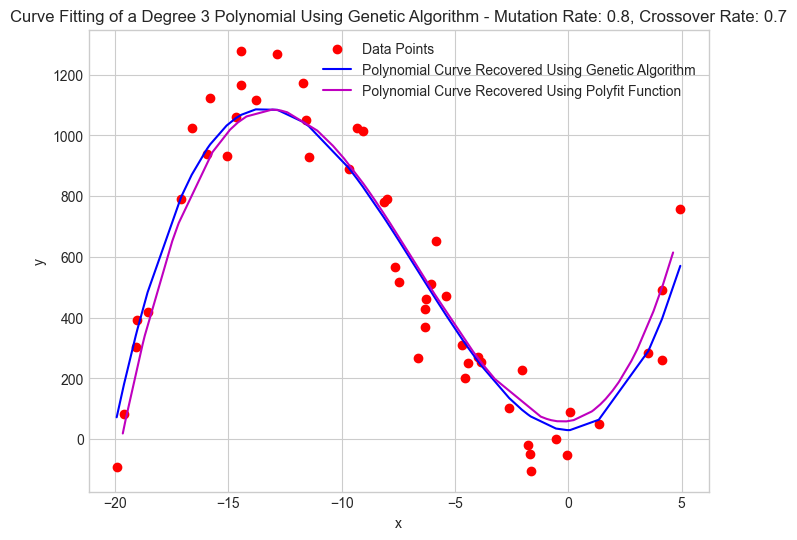

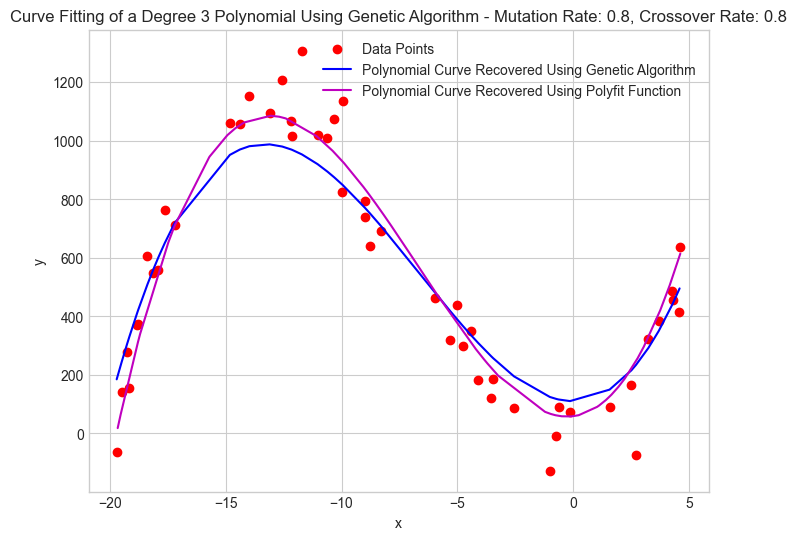

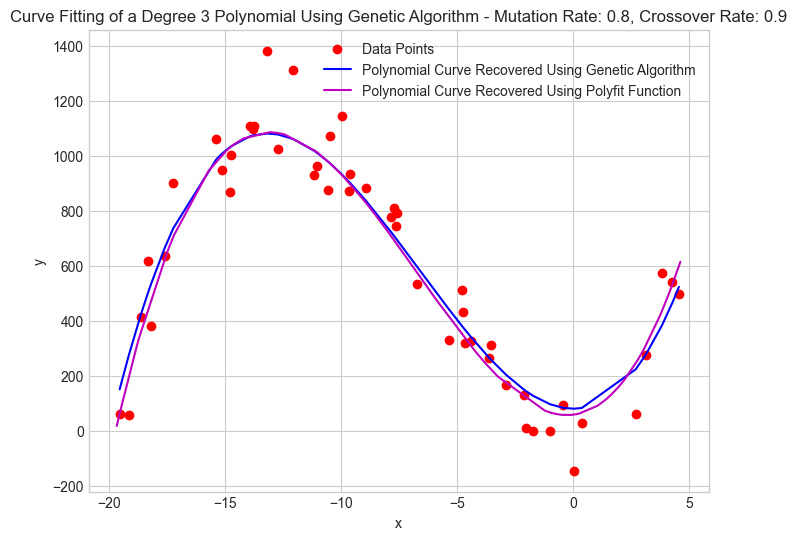

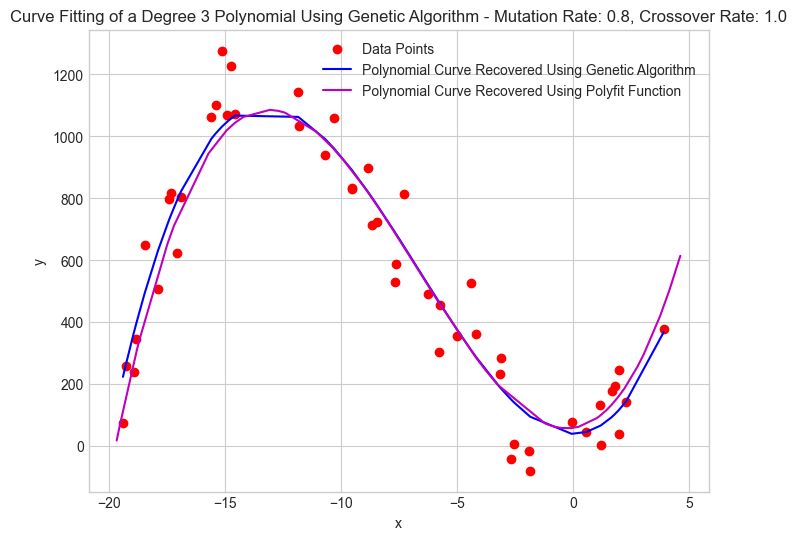

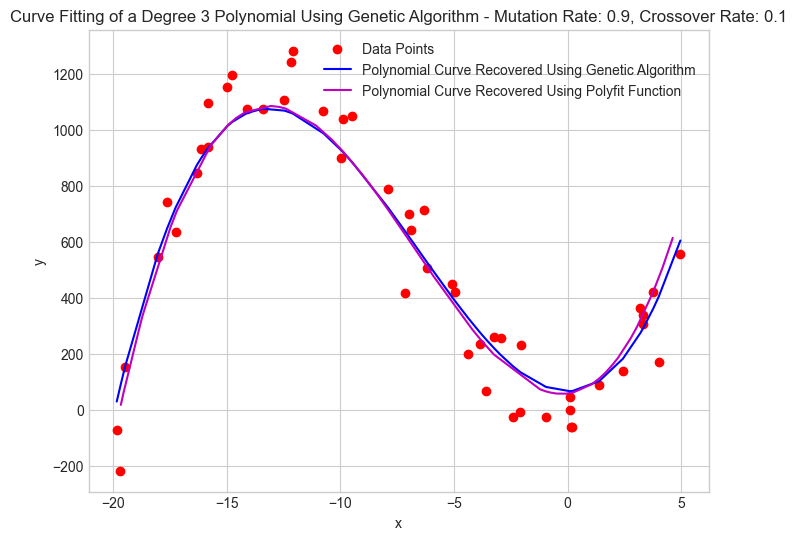

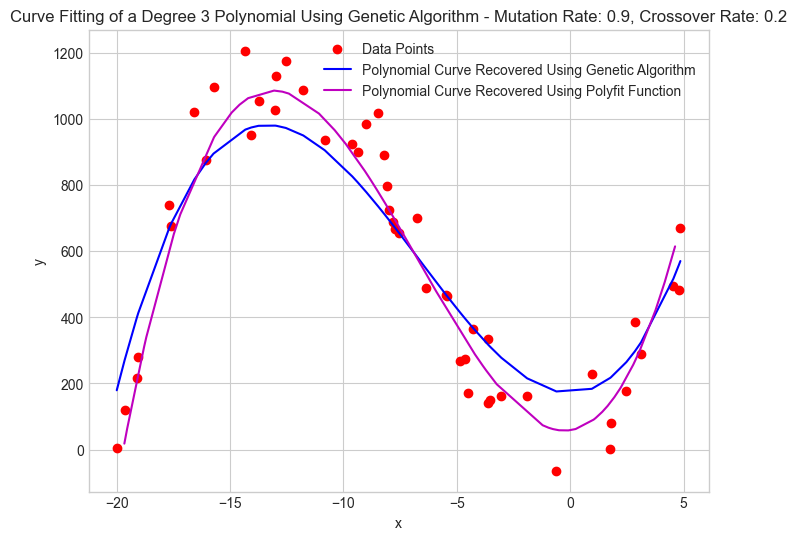

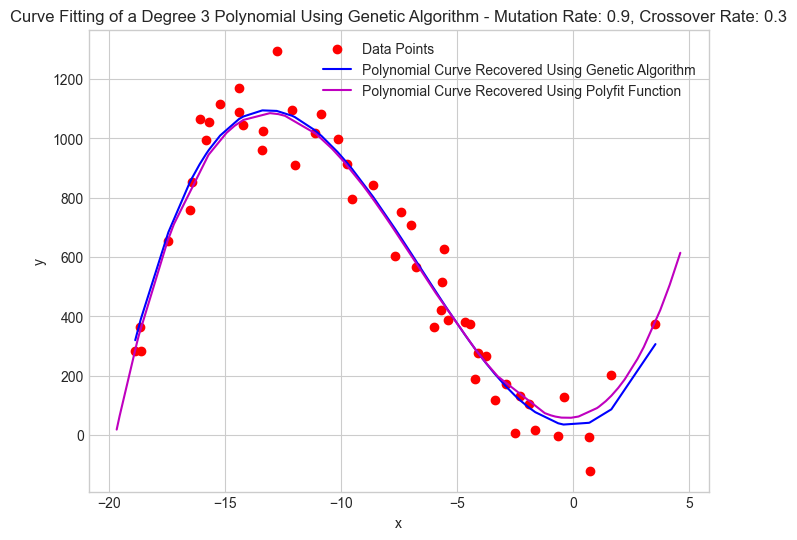

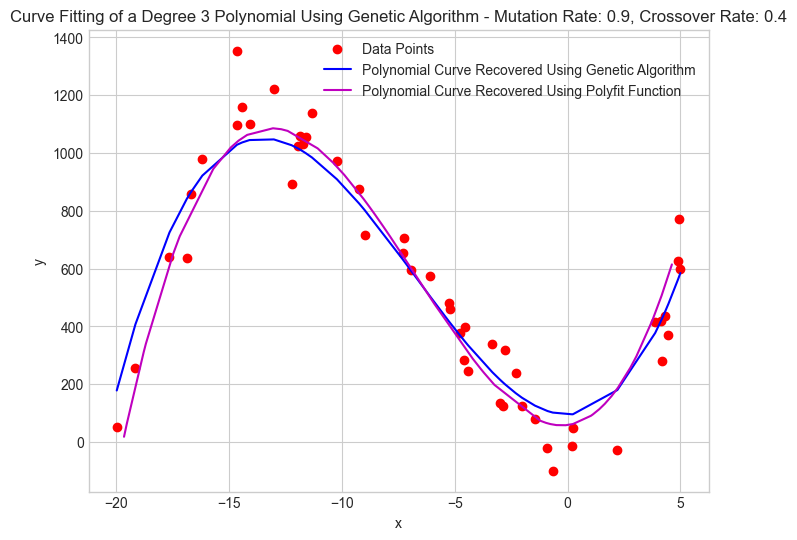

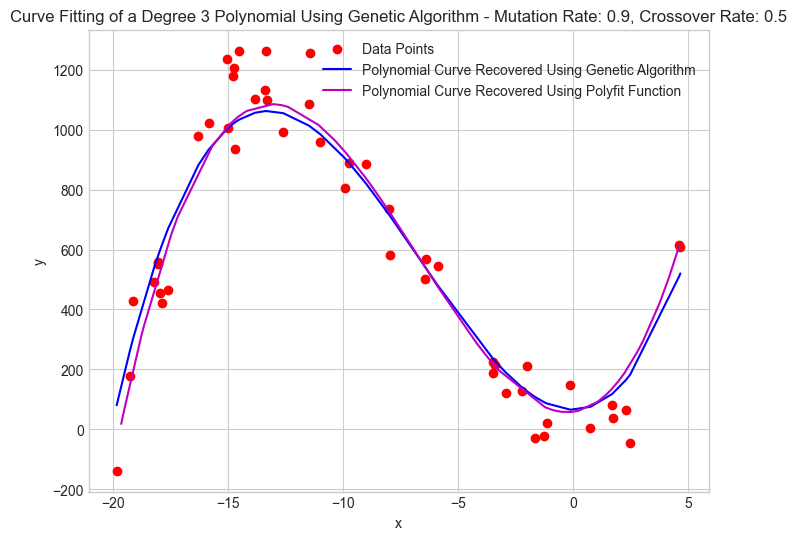

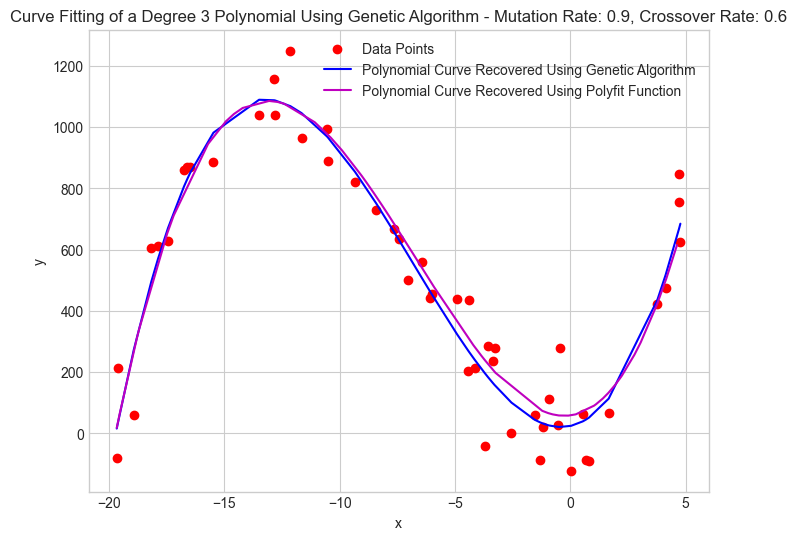

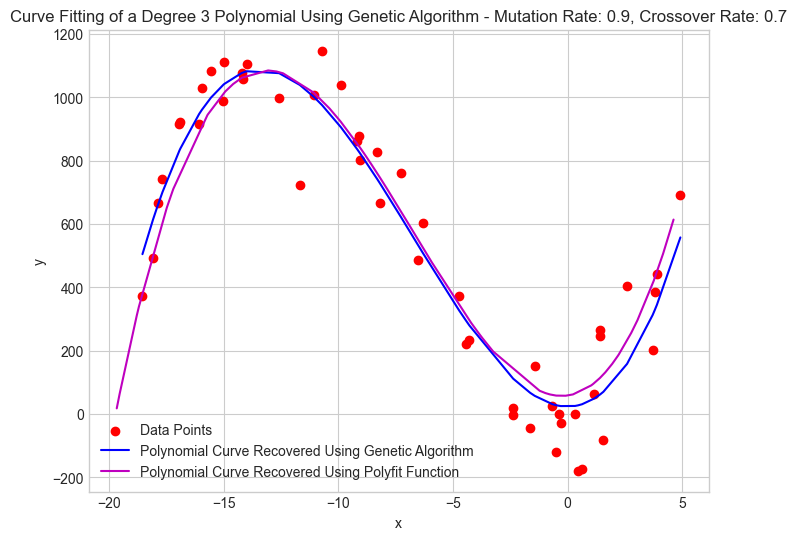

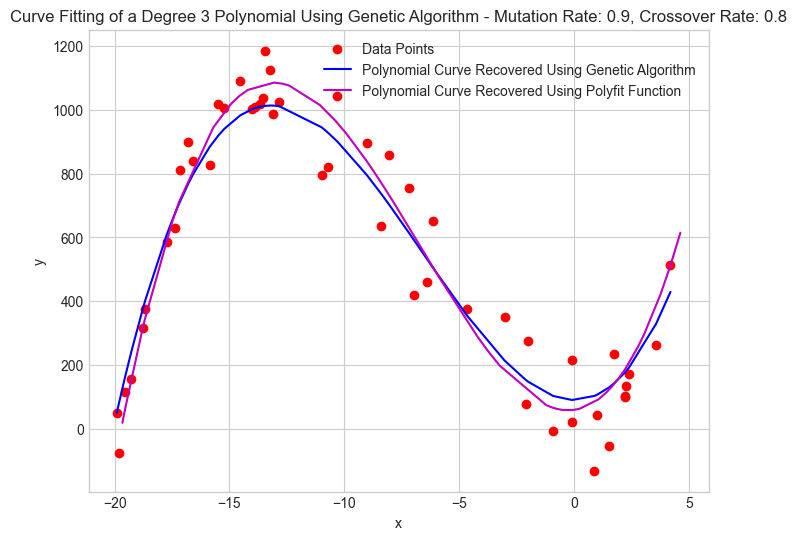

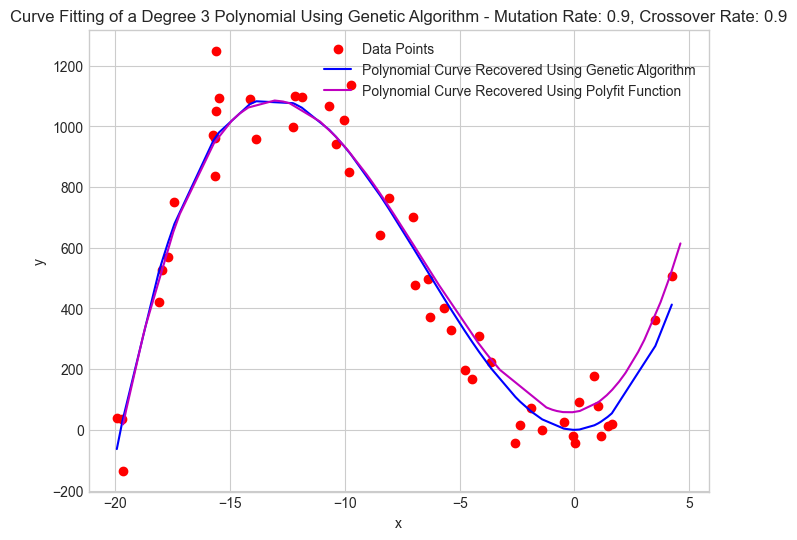

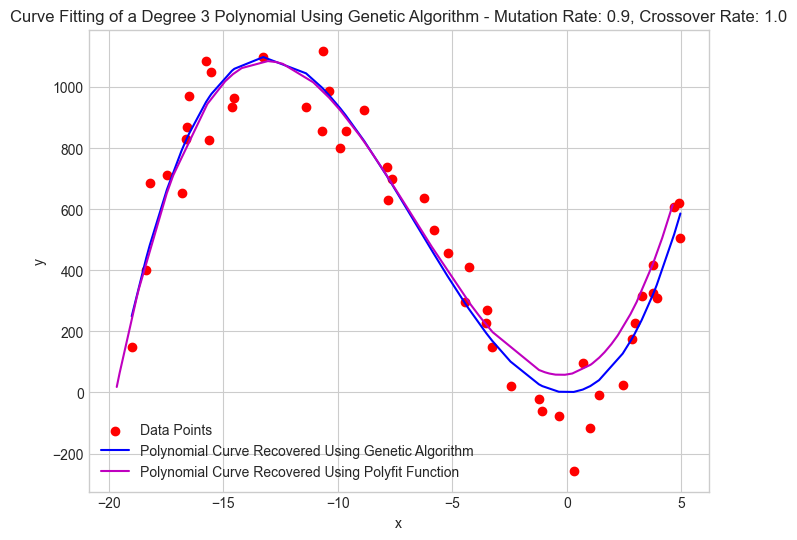

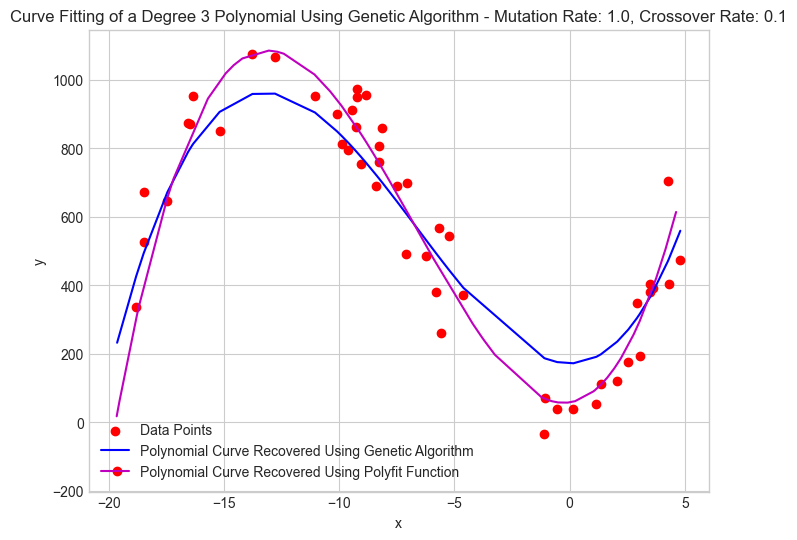

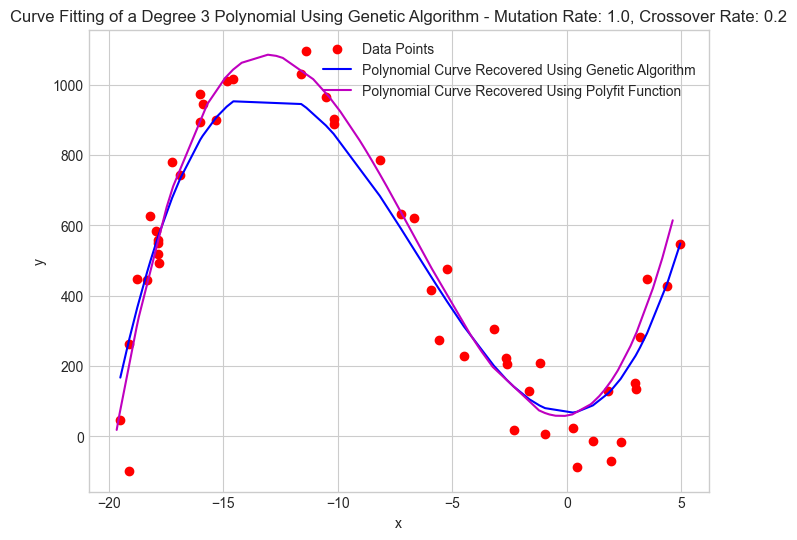

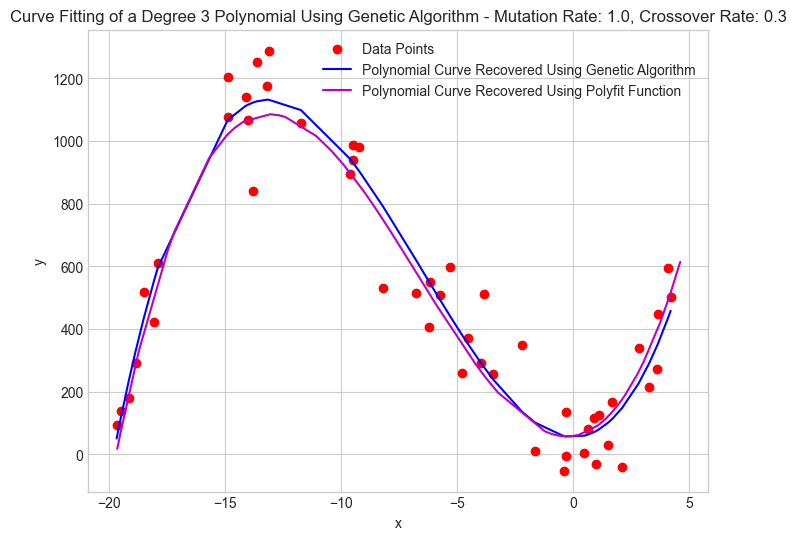

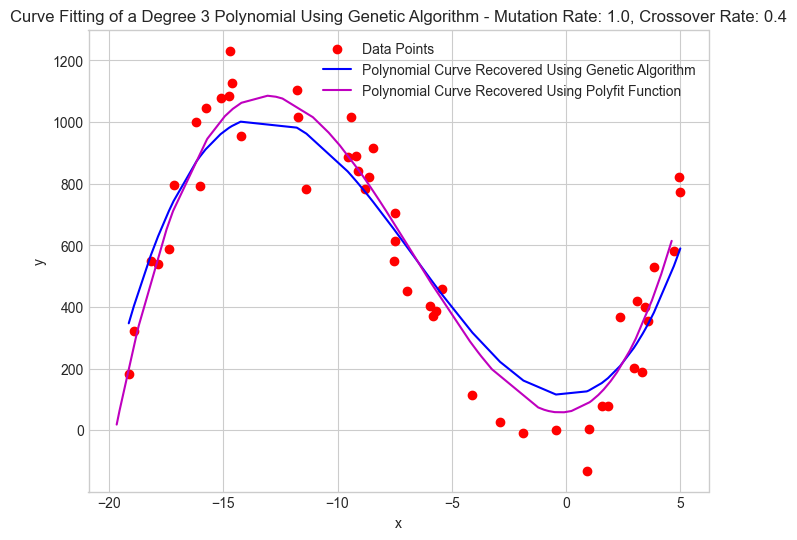

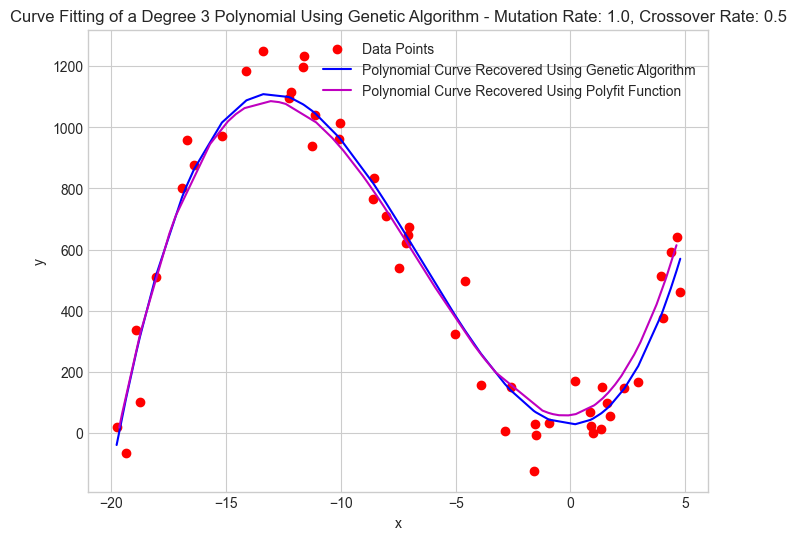

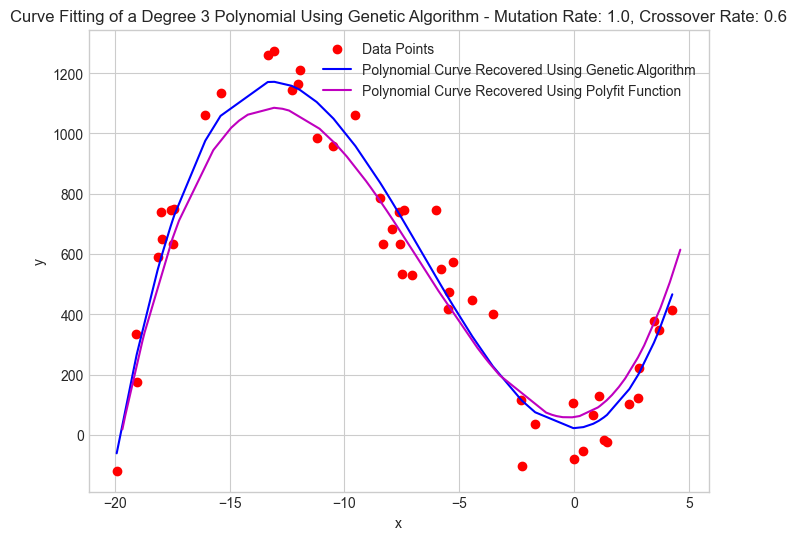

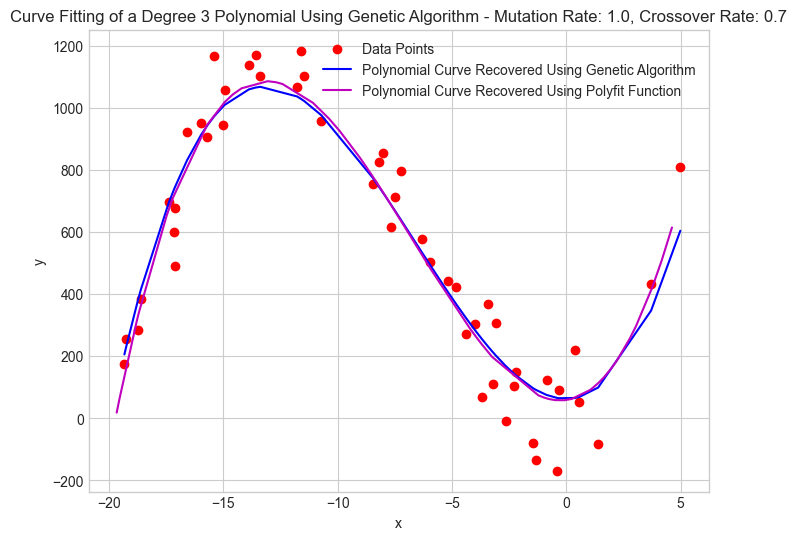

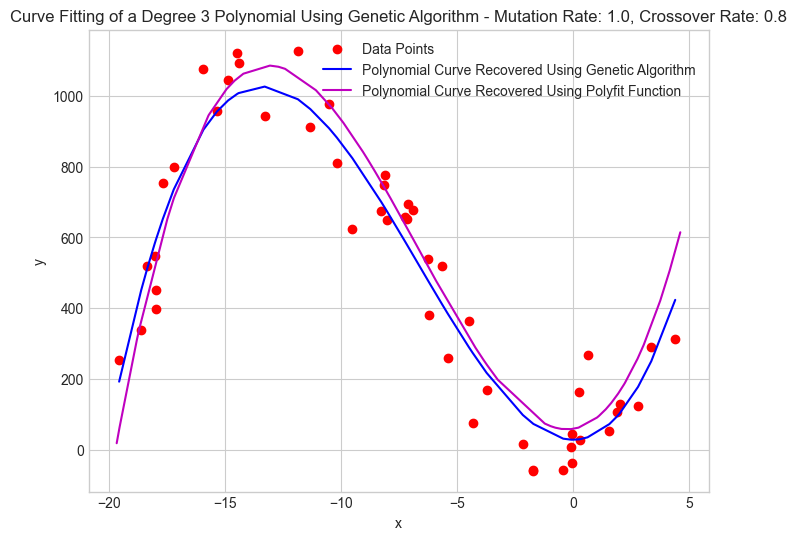

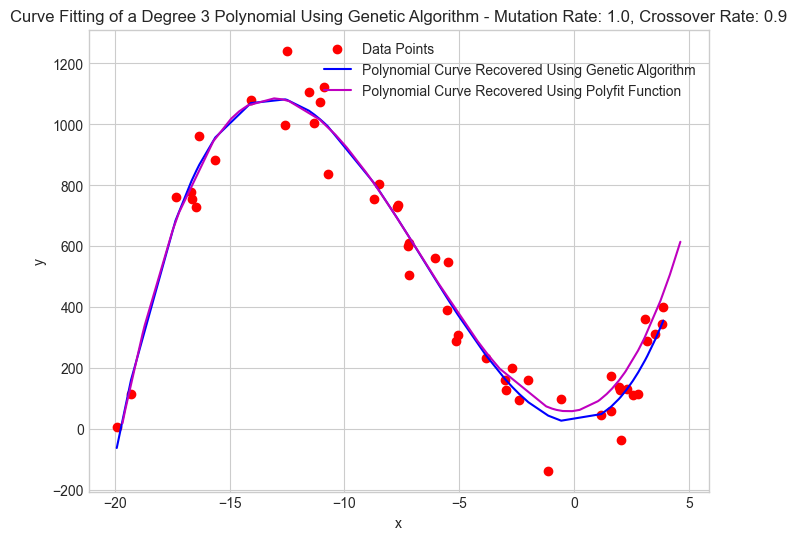

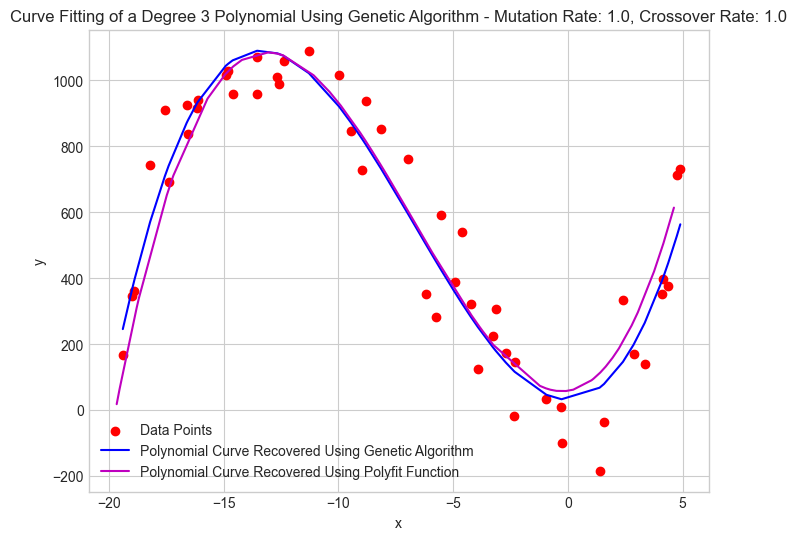

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the fitness of an array for the given polynomial
def fitness(array, x, y):
    y_pred = np.polyval(array[::-1], x)
    error = np.sum((y - y_pred) ** 2)
    return -error

# Probabilistic selection of the best arrays based on fitness
def probabilistic_selection(arrays, scores, num_select):
    probabilities = np.exp(scores - np.max(scores))  # Use exponential transformation for better numerical stability
    probabilities /= np.sum(probabilities)
    selected_indices = np.random.choice(len(arrays), num_select, p=probabilities)
    selected_arrays = [arrays[i] for i in selected_indices]
    return selected_arrays

# Function to generate new arrays from the best arrays with mutation
def mutation(best_arrays, mutation_rate):
    new_arrays = []
    for array in best_arrays:
        for _ in range(9):
            new_array = array.copy()
            # Apply mutation
            if np.random.rand() < mutation_rate:
                random_index = np.random.randint(len(array))
                random_factor = np.random.uniform(0.0, 2.0)
                new_array[random_index] *= random_factor
            new_arrays.append(new_array)
    return new_arrays

# Crossover function with crossover rate
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1))  # Choose a random crossover point
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    else:
        return parent1, parent2

# Main Genetic Algorithm with mutation_rate and crossover_rate
def genetic_algorithm(x, y, num_iterations=500, num_arrays=100, poly_degree=3, mutation_rate=0.1, crossover_rate=0.8):
    arrays = [np.random.rand(poly_degree + 1) for _ in range(num_arrays)]

    for _ in range(num_iterations):
        scores = [fitness(array, x, y) for array in arrays]

        # Select the 10 best arrays probabilistically based on fitness
        best_arrays = probabilistic_selection(arrays, scores, 10)

        # Generate new arrays from the best arrays with mutation
        arrays = mutation(best_arrays, mutation_rate)

        # Perform crossover
        for i in range(0, len(arrays), 2):
            child1, child2 = crossover(arrays[i], arrays[i + 1], crossover_rate)
            arrays[i] = child1
            arrays[i + 1] = child2

    # Select the best array as the final answer
    final_scores = [fitness(array, x, y) for array in arrays]
    best_index = np.argmax(final_scores)
    best_array = arrays[best_index]

    return best_array

# Define mutation rates and crossover rates to explore
mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
crossover_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a new figure for each combination
for i, mutation_rate in enumerate(mutation_rates):
    for j, crossover_rate in enumerate(crossover_rates):
        # Generate noisy data
        noise_scale = 100
        number_of_samples = 50
        x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
        y = 5 * x + 20 * x ** 2 + 1 * x ** 3 + noise_scale * np.random.randn(number_of_samples, 1)

        # Run the genetic algorithm for each combination
        best_polynomial_coefficients = genetic_algorithm(x, y, poly_degree=3, mutation_rate=mutation_rate, crossover_rate=crossover_rate)

        # Generate x values for plotting
        x = x.ravel()
        sorted_x = np.sort(x)

        # Evaluate the polynomial for each x value
        y_values_poly = np.polyval(best_polynomial_coefficients[::-1], sorted_x)

        # Create a new figure for each combination
        plt.figure(figsize=(8, 6))

        # Plot the polynomial and data points
        plt.scatter(x, y, label="Data Points", color='red')
        plt.plot(sorted_x, y_values_poly, label="Polynomial Curve Recovered Using Genetic Algorithm", color='blue')
        plt.plot(polyData["sorted_x"], polyData["y_curve"], 'm-', label='Polynomial Curve Recovered Using Polyfit Function')
        plt.title(f'Curve Fitting of a Degree 3 Polynomial Using Genetic Algorithm - Mutation Rate: {mutation_rate}, Crossover Rate: {crossover_rate}')

        # Add legend
        plt.legend()

        # Add labels
        plt.xlabel('x')
        plt.ylabel('y')

        plt.show()

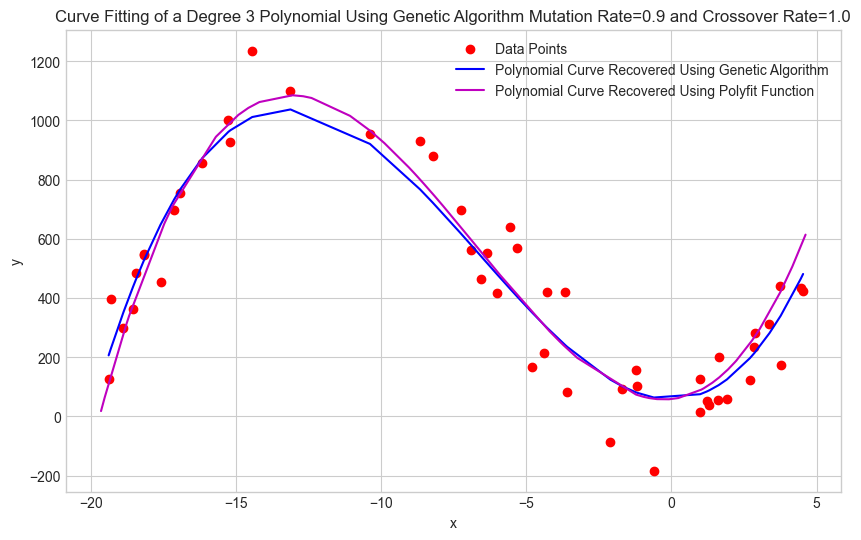

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the fitness of an array for the given polynomial
def fitness(array, x, y):
    y_pred = np.polyval(array[::-1], x)
    error = np.sum((y - y_pred) ** 2)
    return -error

# Probabilistic selection of the best arrays based on fitness
def probabilistic_selection(arrays, scores, num_select):
    probabilities = np.exp(scores - np.max(scores))  # Use exponential transformation for better numerical stability
    probabilities /= np.sum(probabilities)
    selected_indices = np.random.choice(len(arrays), num_select, p=probabilities)
    selected_arrays = [arrays[i] for i in selected_indices]
    return selected_arrays

# Function to generate new arrays from the best arrays with mutation
def mutation(best_arrays, mutation_rate):
    new_arrays = []
    for array in best_arrays:
        for _ in range(9):
            new_array = array.copy()
            # Apply mutation
            if np.random.rand() < mutation_rate:
                random_index = np.random.randint(len(array))
                random_factor = np.random.uniform(0.0, 2.0)
                new_array[random_index] *= random_factor
            new_arrays.append(new_array)
    return new_arrays

# Crossover function with crossover rate
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1))  # Choose a random crossover point
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    else:
        return parent1, parent2

# Main Genetic Algorithm with mutation_rate and crossover_rate
def genetic_algorithm(x, y, num_iterations=500, num_arrays=100, poly_degree=3, mutation_rate=0.1, crossover_rate=0.8):
    arrays = [np.random.rand(poly_degree + 1) for _ in range(num_arrays)]

    for _ in range(num_iterations):
        scores = [fitness(array, x, y) for array in arrays]

        # Select the 10 best arrays probabilistically based on fitness
        best_arrays = probabilistic_selection(arrays, scores, 10)

        # Generate new arrays from the best arrays with mutation
        arrays = mutation(best_arrays, mutation_rate)

        # Perform crossover
        for i in range(0, len(arrays), 2):
            child1, child2 = crossover(arrays[i], arrays[i + 1], crossover_rate)
            arrays[i] = child1
            arrays[i + 1] = child2

    # Select the best array as the final answer
    final_scores = [fitness(array, x, y) for array in arrays]
    best_index = np.argmax(final_scores)
    best_array = arrays[best_index]

    return best_array

# Generate noisy data
noise_scale = 100
number_of_samples = 50
x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x ** 2 + 1 * x ** 3 + noise_scale * np.random.randn(number_of_samples, 1)

# Run the genetic algorithm with mutation_rate and crossover_rate
best_polynomial_coefficients = genetic_algorithm(x, y, poly_degree=3, mutation_rate=0.9, crossover_rate=1.0)

# Generate x values for plotting
x = x.ravel()
sorted_x = np.sort(x)

# Evaluate the polynomial for each x value
y_values_poly = np.polyval(best_polynomial_coefficients[::-1], sorted_x)

# Plot the polynomial and data points
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data Points", color='red')
plt.plot(sorted_x, y_values_poly, label="Polynomial Curve Recovered Using Genetic Algorithm", color='blue')  # Use sorted_x instead of x_values
plt.plot(polyData["sorted_x"], polyData["y_curve"], 'm-', label='Polynomial Curve Recovered Using Polyfit Function')
plt.title("Curve Fitting of a Degree 3 Polynomial Using Genetic Algorithm Mutation Rate=0.9 and Crossover Rate=1.0")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

The data above illustrates a notable correlation: a higher mutation rate (0.5 and higher) corresponds to a more precise polynomial fit. In instances of a low mutation rate, the fit significantly diverged from the polynomial recovered by the polyfit function. However, with an increase in the mutation rate, the genetic algorithm-derived polynomial coefficients demonstrated a considerably closer alignment with those obtained through the polyfit function. The significance of the crossover rate also comes to the forefront. As the crossover rate increased, the polynomial fit exhibited a closer resemblance to the one recovered by the polyfit function. It's worth noting that, in my analysis, the mutation rate emerged as a more influential factor than the crossover rate. A larger mutation rate yielded a closer fit, even when coupled with smaller crossover rates. Conversely, a very low crossover rate, such as 0.01, resulted in a polynomial that deviated significantly from the one recovered by the polyfit function.

A larger mutation rate in polynomial curve fitting through genetic algorithms promotes a more extensive exploration of the solution space, allowing the algorithm to discover and refine coefficients that result in a closer fit to the underlying data. This increased exploration allows the algorithm to search a wider range of potential solutions. In the context of polynomial curve fitting, this exploration is particularly valuable because it allows the algorithm to consider a more diverse set of polynomial coefficients. A diverse set of coefficients facilitates a more comprehensive exploration of the parameter space, potentially uncovering a better fit to the underlying data.

In the context of polynomial curve fitting using genetic algorithms, the crossover rate plays a role in the recombination of genetic material between individuals in the population. While an increased crossover rate is important, its significance is in this case is overshadowed by the influence of the mutation rate.

The crossover operation combines genetic information from two parent individuals to create offspring with a mix of traits from both parents. In polynomial curve fitting, this means combining coefficients from two candidate solutions to potentially create a new solution that inherits beneficial traits.

However, the importance of the crossover rate is tempered by the nature of polynomial curve fitting problems. Polynomial equations often have a high-dimensional search space, and the interaction between polynomial coefficients can be complex. In certain cases, incremental changes achieved through crossover operations might not be sufficient to explore the vast solution space comprehensively.

On the other hand, the mutation operation, by introducing random changes to individuals, facilitates a more diverse exploration of the search space.

# Recovered polynomial coefficients using the genetic algorithm with a mutation rate of 0.9 and crossover rate of 1.0

A mutation rate of 0.9 and a crossover rate of 1.0 resulted in a polynomial fit closely resembling the one recovered by the polyfit function.

A mutation rate of 0.9 implies that, in nearly 90% of the genetic algorithm iterations, each individual in the population undergoes a mutation. This high mutation rate promotes a broad exploration of the solution space by introducing substantial randomness. It allows the algorithm to make significant changes to the coefficients of the polynomial, enabling it to explore a wide range of potential solutions.

A crossover rate of 1.0 means that, in 100% of the iterations, genetic material from two parent individuals is combined to create offspring. This high crossover rate facilitates the exploitation of promising regions of the solution space. By combining the genetic material of individuals that have exhibited favorable traits, the algorithm is more likely to converge toward optimal solutions.

The combination of a high mutation rate and a high crossover rate creates a synergistic effect. The high mutation rate ensures a broad exploration of the solution space, allowing the algorithm to discover diverse solutions. Meanwhile, the high crossover rate facilitates the exploitation of the promising solutions discovered through mutation.

In essence, a mutation rate of 0.9 and a crossover rate of 1.0 fosters a robust and thorough search of the solution space. This combination proved effective in discovering a polynomial fit that closely aligns with the one obtained through the polyfit function.

The polyfit function, tailored for polynomial curve fitting, employs a least squares optimization approach to determine the coefficients of the best degree polynomial obtained in homework #1, which is a degree 3 polynomial. The function minimizes the squared differences between the observed data points and the corresponding points predicted by the polynomial, effectively minimizing the Mean Squared Error (MSE). By performing direct optimizations for the best-fit coefficients, polyfit efficiently identifies the parameters that yield the most accurate representation of the underlying data. 

In contrast, the genetic algorithm approach for a degree 3 polynomial involves the evolution of a population (in this case 100 arrays with 4 elements each) of potential solutions. Through probabilistic selection, mutation, and crossover operations, the genetic algorithm explores a diverse set of polynomial coefficients, adapting over generations. The algorithm's fitness function returns the negative of the Mean Squared Error, aligning with the optimization objective of polyfit. The effectiveness of the genetic algorithm is contingent on the careful tuning of mutation and crossover rates. 

A higher mutation rate, particularly in conjunction with a well-balanced crossover rate, allows the genetic algorithm to navigate a broader solution space, resembling the optimization process performed by polyfit. The synergy between exploration and exploitation in the genetic algorithm contributes to its ability to converge towards polynomial coefficients that closely align with those obtained by the polyfit function for a degree 3 polynomial.

Although the the polynomial recovered by the genetic algorithm closely aligns with the one recovered by the polyfit function, the polyfit function results in a better fit to the data points. The genetic algorithm's reliance on probabilistic processes, population-based exploration, randomness through processes like mutation and probabilistic selection, and the need for careful parameter tuning introduces inherent variability, contributing to slightly less accuracy than the deterministic optimization performed by the polyfit function.